# Start


In [38]:
import numpy as np
import pandas as pd
from collections import UserDict, defaultdict
import json
import pickle
import ast

In [27]:
ast.literal_eval("{'activations_time': 0.07056307792663574, 'fid': 523.3480462375646, 'fid_time': 0.07764315605163574, 'kid': 15186.821, 'kid_time': 0.11810421943664551, 'precision': 0.8309859154929577, 'recall': 0.44929577464788734, 'f1_pr': 0.583255128716919, 'precision_time': 0.28104686737060547, 'recall_time': 0.28104686737060547, 'f1_pr_time': 0.28104686737060547, 'density': 0.5721126760563381, 'coverage': 0.19154929577464788, 'f1_dc': 0.28701847356510385, 'density_time': 0.29992008209228516, 'coverage_time': 0.29992008209228516, 'f1_dc_time': 0.29992008209228516, 'mmd_rbf': 0.30821681022644043, 'mmd_rbf_time': 0.5191750526428223, 'mmd_linear': 54.698395, 'mmd_linear_time': 0.07063078880310059, 'wl_mmd': 0.0028169014084507044, 'wl_mmd_time': 0.7336151599884033, 'nspdk_mmd': 0.08273259451012982, 'nspdk_mmd_time': 4.913599014282227, 'degree_mmd': 0.028354373628677543, 'degree_mmd_time': 11.001905, 'cluster_mmd': 0.007707863316322117, 'cluster_mmd_time': 16.780437, 'spectral_mmd': 0.01823485149096915, 'spectral_mmd_time': 17.246928, 'valid': 1.0, 'unique@1000': 0.5352112676056338, 'unique@10000': 0.5352112676056338, 'FCD/Test': 'Nan', 'SNN/Test': 0.9477126876128391, 'Frag/Test': 0.9663275785436755, 'Scaf/Test': 0.45874733562903347, 'FCD/TestSF': 'Nan', 'SNN/TestSF': 0.369893253122417, 'Frag/TestSF': 0.6808681414420462, 'Scaf/TestSF': 0.0019555704511539096, 'IntDiv': 0.8800916475172295, 'IntDiv2': 0.8575518617636934, 'Filters': 0.8042253521126761, 'logP': 0.4062396197183101, 'SA': 0.05173262624991735, 'QED': 0.009979461019357008, 'weight': 8.865183098591551, 'Novelty': 0.4868421052631579, 'dataset': 'bbb_martins_50', 'generator_name': 'swingnn', 'numer_of_epochs_trained': 500.0}")




{'activations_time': 0.07056307792663574,
 'fid': 523.3480462375646,
 'fid_time': 0.07764315605163574,
 'kid': 15186.821,
 'kid_time': 0.11810421943664551,
 'precision': 0.8309859154929577,
 'recall': 0.44929577464788734,
 'f1_pr': 0.583255128716919,
 'precision_time': 0.28104686737060547,
 'recall_time': 0.28104686737060547,
 'f1_pr_time': 0.28104686737060547,
 'density': 0.5721126760563381,
 'coverage': 0.19154929577464788,
 'f1_dc': 0.28701847356510385,
 'density_time': 0.29992008209228516,
 'coverage_time': 0.29992008209228516,
 'f1_dc_time': 0.29992008209228516,
 'mmd_rbf': 0.30821681022644043,
 'mmd_rbf_time': 0.5191750526428223,
 'mmd_linear': 54.698395,
 'mmd_linear_time': 0.07063078880310059,
 'wl_mmd': 0.0028169014084507044,
 'wl_mmd_time': 0.7336151599884033,
 'nspdk_mmd': 0.08273259451012982,
 'nspdk_mmd_time': 4.913599014282227,
 'degree_mmd': 0.028354373628677543,
 'degree_mmd_time': 11.001905,
 'cluster_mmd': 0.007707863316322117,
 'cluster_mmd_time': 16.780437,
 'spectr

In [39]:
def send_to_dataframe(l):
    r=pd.DataFrame.from_dict(l[0],orient='index')
    #print(r)
    for i  in l[1:]:
        #print(e)
        e=pd.DataFrame.from_dict(i,orient='index')
        r=pd.concat([r, e], axis=1)
        #print(r)
    df=r.T.reset_index().drop(columns=['index'])
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    return df

list_of_dictionaries=[]
for line in  open("updated_data.txt", 'r'):
    line=line.rstrip('n')
    print(line.replace('\n',''))
    dictionary = ast.literal_eval(line)
    list_of_dictionaries.append(dictionary)




{'activations_time': 0.03394290804862976, 'fid': 7.179359633341102, 'fid_time': 0.04643222689628601, 'kid': 0.8793472945690155, 'kid_time': 0.05668611824512482, 'precision': 0.9409034653465348, 'recall': 0.9531249999999999, 'f1_pr': 0.9468794187799543, 'precision_time': 0.1222386509180069, 'recall_time': 0.1222386509180069, 'f1_pr_time': 0.1222386509180069, 'density': 0.9648514851485148, 'coverage': 0.9146875000000001, 'f1_dc': 0.9385601417667535, 'density_time': 0.07578647136688232, 'coverage_time': 0.07578647136688232, 'f1_dc_time': 0.07578647136688232, 'mmd_rbf': 0.01638800837099552, 'mmd_rbf_time': 0.10798951983451843, 'mmd_linear': 3.6395540088415146, 'mmd_linear_time': 0.034045472741127014, 'wl_mmd': 0.00995049504950495, 'wl_mmd_time': 0.4732666015625, 'nspdk_mmd': 0.011000416139730684, 'nspdk_mmd_time': 7.384618282318115, 'degree_mmd': 0.00023021246933629946, 'degree_mmd_time': 14.022374, 'cluster_mmd': 0.008986735625242104, 'cluster_mmd_time': 14.893043, 'spectral_mmd': 0.00460

In [40]:
df=send_to_dataframe(list_of_dictionaries) 
df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
#df=df.fillna(0)
#print(df.columns)

generators_labels=['STGG','GDSS','HierVAE','MoFlow','WGAN','JTNN','SWINGNN','train1','train2', 'train1/2+train2/2']
datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
structural_metrics=['nspdk_mmd','cluster_mmd', 'spectral_mmd','wl_mmd']
molecular_metrics=molecular_metrics=['logP', 'SA', 'QED', 'weight', 'Novelty','FCD/Test', 'SNN/Test' ,'IntDiv', 'IntDiv2', 'unique@1000', 'unique@10000', 'valid', 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'Filters']
nn_metrics = [ 'precision', 'density', 'recall', 'coverage', 'f1_pr', 'f1_dc', 'fid', 'kid', 'mmd_linear',
               'mmd_rbf']
new_metrics=['AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nn_classifier']

generators=['stgg','gdss','hiervae','moflow','wgan','train1','rewired','corrupted', 'mode_dropping','mode_collapse']
df_50=df.loc[ (df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50') ]

df_mean_by_generator=df_50.groupby('generator_name').mean()
df_mean_by_dataset=df.groupby(['dataset','generator_name']).mean()

df_sigma_by_generator=df_50.groupby('generator_name').std()
df_sigma_by_dataset=df.groupby(['dataset','generator_name']).std()

stgg=df.loc[(df.generator_name=='stgg')]
gdss=df.loc[(df.generator_name=='gdss')]
moflow=df.loc[(df.generator_name=='moflow')]
wgan=df.loc[(df.generator_name=='wgan')]
hiervae=df.loc[(df.generator_name=='hiervae')]
jtnn=df.loc[(df.generator_name=='jtnn')]
swingnn=df.loc[(df.generator_name=='swingnn')]
rewired=df.loc[(df.generator_name=='rewired')]
mode_dropping=df.loc[(df.generator_name=='mode_dropping')]
mode_collapse=df.loc[(df.generator_name=='mode_collapse')]



rewired1=df.loc[(df.generator_name=='rewired') & (df.dataset=='synthetic_1_50')]
mode_dropping1=df.loc[(df.generator_name=='mode_dropping') & (df.dataset=='synthetic_1_50') ]
corrupted1=df.loc[(df.generator_name=='corrupted') & (df.dataset=='synthetic_1_50')]
mode_collapse1=df.loc[(df.generator_name=='mode_collapse') & (df.dataset=='synthetic_1_50') ]

rewired2=df.loc[(df.generator_name=='rewired') & (df.dataset=='synthetic_2_50')]
mode_dropping2=df.loc[(df.generator_name=='mode_dropping') & (df.dataset=='synthetic_2_50') ]
corrupted2=df.loc[(df.generator_name=='corrupted') & (df.dataset=='synthetic_2_50')]
mode_collapse2=df.loc[(df.generator_name=='mode_collapse') & (df.dataset=='synthetic_2_50') ]

/var/folders/f7/1l2vx5590r52ltb17tksrwpc0000gn/T/ipykernel_23183/4251586697.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_by_generator=df_50.groupby('generator_name').mean()
/var/folders/f7/1l2vx5590r52ltb17tksrwpc0000gn/T/ipykernel_23183/4251586697.py:24: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sigma_by_generator=df_50.groupby('generator_name').std()


In [ ]:
df.replace(r'^\s*$', np.nan, regex=True, inplace = True)
df['FCD/Test']


In [41]:
df[['generator_name','dataset']+nn_metrics].iloc[8:16,:6]

,generator_name,dataset,precision,density,recall,coverage
8,gdss,synthetic_1_25,0.395937,0.319625,0.951250,0.583125
9,gdss,synthetic_1_33,0.442708,0.409233,0.987216,0.738636
10,gdss,synthetic_1_40,0.469922,0.409102,0.982422,0.672852
11,gdss,synthetic_1_50,0.426406,0.361406,0.994844,0.614531
12,gdss,synthetic_2_25,0.640312,0.387688,0.935000,0.620938
13,gdss,synthetic_2_33,0.642756,0.445786,0.977036,0.662169
14,gdss,synthetic_2_40,0.633594,0.533086,0.986719,0.699023
15,gdss,synthetic_2_50,0.737812,0.611375,0.984219,0.775000


In [42]:
df[['generator_name','dataset']+structural_metrics].iloc[8:16,:6]

,generator_name,dataset,nspdk_mmd,cluster_mmd,spectral_mmd,wl_mmd
8,gdss,synthetic_1_25,0.011224,0.020620,0.006042,0.010000
9,gdss,synthetic_1_33,0.008453,0.022098,0.004978,0.007576
10,gdss,synthetic_1_40,0.006477,0.014338,0.002222,0.006250
11,gdss,synthetic_1_50,0.005773,0.014480,0.002921,0.005000
12,gdss,synthetic_2_25,0.017093,0.018063,0.005379,0.010000
13,gdss,synthetic_2_33,0.016737,0.012901,0.003552,0.007576
14,gdss,synthetic_2_40,0.010215,0.017364,0.002823,0.006250
15,gdss,synthetic_2_50,0.009759,0.010641,0.001347,0.005000


In [19]:
from matplotlib import pyplot as plt
no_train2=df[ df['generator_name']!='swingnn' ]
dataset='synthetic_1_50'
label='synthetic_1_50'
nn=no_train2[no_train2.dataset==dataset][nn_metrics+['numer_of_epochs_trained','generator_name']]
structural=no_train2[no_train2.dataset==dataset][structural_metrics+['numer_of_epochs_trained','generator_name']]
ax=structural.plot( x='numer_of_epochs_trained',kind='line',rot=90,style='.-')
ax.set_title(label)
ax.set_xlabel('Number of epochs trained with SwinGNN')
ax.set_xticks([250, 500, 1250, 1650, 2000, 2500, 3300, 3750, 5000])
#ax.set_xticklabels([0,250,500,1000,1250,2000,3000,4000,5000])

ax=nn.plot( x='numer_of_epochs_trained',kind='line',rot=90,style='.-')
ax.set_title(label)
ax.set_xlabel('Number of epochs trained with SwinGNN')
ax.set_xticks([250, 500, 1250, 1650, 2000, 2500, 3300, 3750, 5000])
ax.set_ylim(0,1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels([0,250,500,1000,1250,2000,3000,4000,5000])

KeyError: "['numer_of_epochs_trained'] not in index"

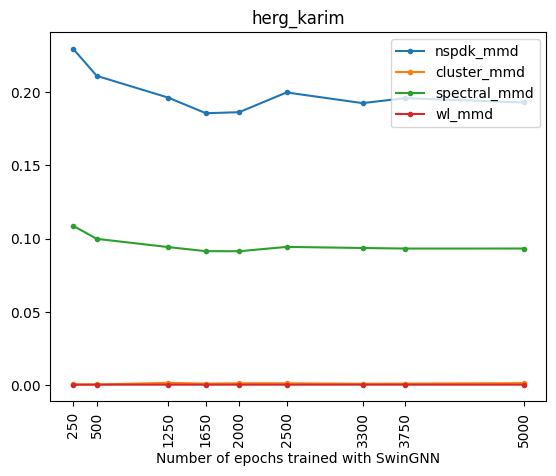

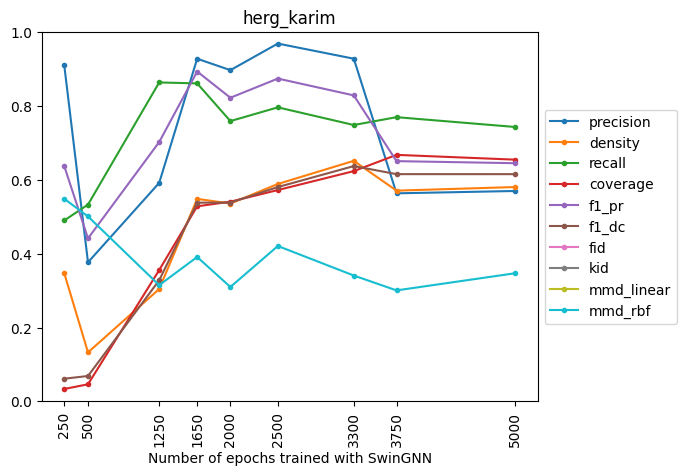

In [96]:
from matplotlib import pyplot as plt
no_train2=df[ df['generator_name']!='train2' ]
dataset='herg_karim_50'
label='herg_karim'
nn=no_train2[no_train2.dataset==dataset][nn_metrics+['numer_of_epochs_trained','generator_name']]
structural=no_train2[no_train2.dataset==dataset][structural_metrics+['numer_of_epochs_trained','generator_name']]
ax=structural.plot( x='numer_of_epochs_trained',kind='line',rot=90,style='.-')
ax.set_title(label)
ax.set_xlabel('Number of epochs trained with SwinGNN')
ax.set_xticks([250, 500, 1250, 1650, 2000, 2500, 3300, 3750, 5000])
#ax.set_xticklabels([0,250,500,1000,1250,2000,3000,4000,5000])

ax=nn.plot( x='numer_of_epochs_trained',kind='line',rot=90,style='.-')
ax.set_title(label)
ax.set_xlabel('Number of epochs trained with SwinGNN')
ax.set_xticks([250, 500, 1250, 1650, 2000, 2500, 3300, 3750, 5000])
ax.set_ylim(0,1)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_xticklabels([0,250,500,1000,1250,2000,3000,4000,5000])

In [6]:
df_mean_by_generator[nn_metrics]


,precision,density,recall,coverage,f1_pr,f1_dc,fid,kid,mmd_linear,mmd_rbf
generator_name,,,,,,,,,,
swingnn,0.887086,0.844728,0.780752,0.682010,0.822130,0.744177,1200.642111,1.451056e+07,395.042368,0.126775
train2,0.964645,0.992523,0.964546,0.968424,0.964602,0.980245,296.164929,3.411489e+02,0.230807,0.001233


In [22]:
df

,numer_of_epochs_trained,activations_time,fid,fid_time,kid,kid_time,precision,recall,f1_pr,precision_time,...,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty,dataset,generator_name
0,250.0,0.213661,26.505538,0.215860,9.191108e-01,0.305007,0.862976,0.582646,0.695641,1.294028,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
1,500.0,0.223826,20.433321,0.239322,2.417228e-01,0.335943,0.863369,0.747546,0.801304,0.836048,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
2,1250.0,0.201012,8.059188,0.214623,1.517330e-01,0.326479,0.932077,0.876718,0.903560,1.325950,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
3,1650.0,0.219093,7.807904,0.222653,1.038934e+00,0.310876,0.972124,0.919906,0.945304,0.689639,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
4,2000.0,0.216371,0.985526,0.229608,1.400491e-02,0.300496,0.979191,0.908520,0.942543,1.051362,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
5,2500.0,1.493328,2.281675,2.458544,1.495319e-01,1.518037,0.990577,0.909698,0.948426,4.668890,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
6,3300.0,0.206399,0.886952,0.213869,-9.009635e-02,0.333080,0.995681,0.907342,0.949471,1.007928,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
7,3750.0,0.227898,1.638007,0.235107,6.865263e-02,0.299746,0.990577,0.922261,0.955209,0.783967,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
8,5000.0,0.228880,1.615512,0.241160,5.071179e-02,0.356912,0.990577,0.890067,0.937646,1.168027,...,0.907437,0.886168,0.678053,0.056141,0.071185,0.009831,3.317675,0.303297,ames_50,swingnn
9,250.0,0.061205,61.611018,0.072908,3.592687e+00,0.147533,0.763380,0.469014,0.581052,0.463417,...,0.880092,0.857552,0.804225,0.406240,0.051733,0.009979,8.865183,0.486842,bbb_martins_50,swingnn


In [18]:
df_mean_by_generator[structural_metrics]


,nspdk_mmd,cluster_mmd,spectral_mmd,wl_mmd
generator_name,,,,
swingnn,0.051249,0.000942,0.019326,0.001049
train2,0.000876,0.000033,0.000289,0.001049


In [66]:
df_mean_by_generator[molecular_metrics]

,valid,unique@1000,unique@10000,FCD/Test,SNN/Test,Frag/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty
generator_name,,,,,,,,,,,,,,,,,
gdss,1.0,0.991167,0.987257,2.996828e+01,0.202437,0.350434,37.120148,0.211850,0.306286,0.907220,0.898787,0.255719,0.623588,2.688571,0.121853,51.037544,0.998742
hiervae,1.0,0.352845,0.218987,3.466089e+01,0.271248,0.296485,34.158070,0.218588,0.293606,0.875489,0.801717,0.858450,1.877169,0.558033,0.145885,229.673890,0.994430
jtnn,1.0,0.226573,0.201588,4.249194e+01,0.234746,0.033048,41.857763,0.183167,0.031063,0.910432,0.817104,0.704518,2.430426,0.413705,0.186989,255.095871,0.994982
moflow,1.0,0.792302,0.753671,3.962296e+01,0.205075,0.257783,44.321545,0.151983,0.211889,0.908970,0.859673,0.362164,1.853868,2.147626,0.230938,192.158638,0.996727
stgg,1.0,0.894012,0.879547,3.623437e+00,0.536848,0.975772,15.582428,0.363267,0.819307,0.890578,0.876349,0.669253,0.253371,0.439938,0.024363,26.329783,0.880795
swingnn,1.0,0.969829,0.946254,2.105085e+01,0.317382,0.671695,27.914512,0.271773,0.561893,0.905051,0.891127,0.506711,0.546837,0.987945,0.115318,93.493777,0.973811
train1,1.0,0.998894,0.998996,-3.292181e-13,1.000000,1.000000,13.658128,0.404695,0.867630,0.881270,0.869615,0.778069,0.000000,0.000000,0.000000,0.000000,0.006262
train1/2+train2/2,1.0,0.998660,0.998368,2.165448e+00,0.786980,0.982741,14.292240,0.411512,0.835365,0.876225,0.863752,0.769082,0.389806,0.130135,0.018319,12.818713,0.500398
train2,1.0,0.999130,0.999100,1.433003e+00,0.567297,0.990863,13.910872,0.405405,0.852826,0.881973,0.870262,0.778650,0.084033,0.040396,0.007132,6.311252,0.996311


In [67]:
df_mean_by_dataset[molecular_metrics]

valid  unique@1000  \
dataset                      generator_name                          
ames_25                      gdss                 1.0        0.670   
                             hiervae              1.0        0.145   
                             jtnn                 1.0        0.131   
                             moflow               1.0        0.635   
                             stgg                 1.0        0.915   
...                                               ...          ...   
lipophilicity_astrazeneca_50 swingnn              1.0        0.988   
                             train1               1.0        1.000   
                             train1/2+train2/2    1.0        1.000   
                             train2               1.0        1.000   
                             wgan                 1.0        0.308   

                                                unique@10000      FCD/Test  \
dataset                      generator_name                                  
ames_25                      gdss                   0.696183  1.878022e+01   
                             hiervae                0.138256           NaN   
                             jtnn                   0.113904           NaN   
                             moflow                 0.593087  2.364630e+01   
                             stgg                   0.915161  3.026482e+00   
...                                                      ...           ...   
lipophilicity_astrazeneca_50 swingnn                0.985034  2.943142e+01   
                             train1                 1.000000  1.705303e-13   
                             train1/2+train2/2      1.000000  1.229961e+00   
                             train2                 1.000000  1.935364e+00   
                             wgan                   0.287755           NaN   

                                                SNN/Test  Frag/Test  \
dataset                      generator_name                           
ames_25                      gdss               0.220026   0.393793   
                             hiervae            0.348709   0.013273   
                             jtnn               0.278590   0.000816   
                             moflow             0.331343   0.175331   
                             stgg               0.517592   0.938655   
...                                                  ...        ...   
lipophilicity_astrazeneca_50 swingnn            0.212575   0.564434   
                             train1             1.000000   1.000000   
                             train1/2+train2/2  0.786414   0.997288   
                             train2             0.564618   0.995948   
                             wgan               0.050943   0.000000   

                                                FCD/TestSF  SNN/TestSF  \
dataset                      generator_name                              
ames_25                      gdss                40.187244    0.195695   
                             hiervae                   NaN    0.139073   
                             jtnn                      NaN    0.131773   
                             moflow              45.765412    0.146722   
                             stgg                25.416512    0.298526   
...                                                    ...         ...   
lipophilicity_astrazeneca_50 swingnn             29.065307    0.251209   
                             train1               9.829002    0.431778   
                             train1/2+train2/2    9.886960    0.433314   
                             train2               9.809519    0.430976   
                             wgan                      NaN    0.065683   

                                                Frag/TestSF    IntDiv  \
dataset                      generator_name                             
ames_25                      gdss                  0.222618  0.920276   
                

# Generate Latex Table

In [28]:
def generate_latex_table(dictionary_of_metric_values, headers):


    textabular = f"l|{'r'*len(headers)}"
    texheader = " & " + " & ".join(headers) + "\\\\"
    texdata = "\\hline\n"
    for label in sorted(dictionary_of_metric_values):
        if label == "z":
            texdata += "\\hline\n"
        texdata += f"{label} & {' & '.join(map(str,dictionary_of_metric_values[label]))} \\\\\n"

    print("\\begin{tabular}{"+textabular+"}")
    print(texheader)
    print(texdata,end="")
    print("\\end{tabular}")


In [149]:
df_mean_by_generator[molecular_metrics]


,logP,SA,QED,weight,Novelty,FCD/Test,SNN/Test,IntDiv,IntDiv2,unique@1000,unique@10000,valid,Frag/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,Filters
generator_name,,,,,,,,,,,,,,,,,
gdss,0.623588,2.688571,0.121853,51.037544,0.998742,2.996828e+01,0.202437,0.907220,0.898787,0.991167,0.987257,1.0,0.350434,37.120148,0.211850,0.306286,0.255719
hiervae,1.877169,0.558033,0.145885,229.673890,0.994430,3.466089e+01,0.271248,0.875489,0.801717,0.352845,0.218987,1.0,0.296485,34.158070,0.218588,0.293606,0.858450
jtnn,2.430426,0.413705,0.186989,255.095871,0.994982,4.249194e+01,0.234746,0.910432,0.817104,0.226573,0.201588,1.0,0.033048,41.857763,0.183167,0.031063,0.704518
moflow,1.853868,2.147626,0.230938,192.158638,0.996727,3.962296e+01,0.205075,0.908970,0.859673,0.792302,0.753671,1.0,0.257783,44.321545,0.151983,0.211889,0.362164
stgg,0.253371,0.439938,0.024363,26.329783,0.880795,3.623437e+00,0.536848,0.890578,0.876349,0.894012,0.879547,1.0,0.975772,15.582428,0.363267,0.819307,0.669253
swingnn,0.546837,0.987945,0.115318,93.493777,0.973811,2.105085e+01,0.317382,0.905051,0.891127,0.969829,0.946254,1.0,0.671695,27.914512,0.271773,0.561893,0.506711
train1,0.000000,0.000000,0.000000,0.000000,0.006262,-3.292181e-13,1.000000,0.881270,0.869615,0.998894,0.998996,1.0,1.000000,13.658128,0.404695,0.867630,0.778069
train1/2+train2/2,0.389806,0.130135,0.018319,12.818713,0.500398,2.165448e+00,0.786980,0.876225,0.863752,0.998660,0.998368,1.0,0.982741,14.292240,0.411512,0.835365,0.769082
train2,0.084033,0.040396,0.007132,6.311252,0.996311,1.433003e+00,0.567297,0.881973,0.870262,0.999130,0.999100,1.0,0.990863,13.910872,0.405405,0.852826,0.778650


In [151]:
df_sigma_by_generator[loc]

,Frag/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,Filters
generator_name,,,,,
gdss,0.132814,1.696936,0.008833,0.110885,0.164496
hiervae,0.271365,3.410671,0.048683,0.285020,0.065911
jtnn,0.014372,0.596305,0.020745,0.017280,0.035726
moflow,0.135296,1.759929,0.026144,0.135079,0.260576
stgg,0.026272,6.141788,0.044272,0.131962,0.100736
swingnn,0.190950,5.103279,0.031870,0.154269,0.109417
train1,0.000000,5.775834,0.047235,0.086393,0.119262
train1/2+train2/2,0.014927,6.663016,0.056997,0.118227,0.155983
train2,0.012702,6.029563,0.046829,0.104510,0.118754


In [199]:
df_mean_by_generator[loc]

,SA,QED,weight
generator_name,,,
gdss,2.688571,0.121853,51.037544
hiervae,0.558033,0.145885,229.673890
jtnn,0.413705,0.186989,255.095871
moflow,2.147626,0.230938,192.158638
stgg,0.439938,0.024363,26.329783
swingnn,0.987945,0.115318,93.493777
train1,0.000000,0.000000,0.000000
train1/2+train2/2,0.130135,0.018319,12.818713
train2,0.040396,0.007132,6.311252


In [147]:
df_mean_by_generator[structural_metrics].to_latex(escape=False)

/var/folders/f7/1l2vx5590r52ltb17tksrwpc0000gn/T/ipykernel_21704/2414130933.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_mean_by_generator[structural_metrics].to_latex(escape=False)


'\\begin{tabular}{lrrrr}\n\\toprule\n{} &  nspdk_mmd &  cluster_mmd &  spectral_mmd &    wl_mmd \\\\\ngenerator_name    &            &              &               &           \\\\\n\\midrule\ngdss              &   0.056437 &     0.030545 &      0.018097 &  0.000811 \\\\\nhiervae           &   0.141269 &     0.001869 &      0.117027 &  0.001057 \\\\\njtnn              &   0.157914 &     0.002310 &      0.148409 &  0.001055 \\\\\nmoflow            &   0.188410 &     0.001520 &      0.128964 &  0.001086 \\\\\nstgg              &   0.003521 &     0.000768 &      0.000890 &  0.001075 \\\\\nswingnn           &   0.044706 &     0.001737 &      0.013766 &  0.001051 \\\\\ntrain1            &   0.000000 &     0.000000 &      0.000000 &  0.001049 \\\\\ntrain1/2+train2/2 &   0.000433 &     0.000040 &      0.000132 &  0.001049 \\\\\ntrain2            &   0.000879 &     0.000033 &      0.000289 &  0.001049 \\\\\nwgan              &   0.308418 &     0.078581 &      0.301764 &  0.001688 \\\\\n\\botto

In [202]:
list(merged.columns.values[:3])

['SA_x', 'QED_x', 'weight_x']

In [212]:

#aligns median and standard deviation 
def sort_lcustom_ist(list):
 
    zipped_pairs = zip(list[:len(list)//2], list[len(list)//2:])
   
    z = [(x,y) for x, y in (zipped_pairs)]
    new_list=[i for el  in z for i in el]
 
    return new_list

sort_lcustom_ist(['SA_x', 'QED_x', 'weight_x','SA_y', 'QED_y', 'weight_y']
)

['SA_x', 'SA_y', 'QED_x', 'QED_y', 'weight_x', 'weight_y']

In [233]:
df_mean_by_generator[loc]

,SA,QED,weight
generator_name,,,
gdss,2.688571,0.121853,51.037544
hiervae,0.558033,0.145885,229.673890
jtnn,0.413705,0.186989,255.095871
moflow,2.147626,0.230938,192.158638
stgg,0.439938,0.024363,26.329783
swingnn,0.987945,0.115318,93.493777
train1,0.000000,0.000000,0.000000
train1/2+train2/2,0.130135,0.018319,12.818713
train2,0.040396,0.007132,6.311252


In [244]:
loc = molecular_metrics[13:]


dfs1=df_mean_by_generator[loc]
dfs2=df_sigma_by_generator[loc]
generators=['stgg','gdss','hiervae','jtnn','moflow','wgan', 'swingnn', 'train1','train2','train1/2+train2/2']
merged=pd.merge(dfs1, dfs2, left_index=True, right_index=True, how='outer')
sorted_columns=sort_lcustom_ist(list(merged.columns.values))
save=merged.index.values
S = ['mean', 'std']
header = [np.repeat(loc, len(S)), np.tile(S, len(loc))]
#         ^^^ repeat `loc` 3 times   ^^^^ duplicate `S` twice
#print(merged)
new_dfs = pd.DataFrame(np.array(merged[sorted_columns].to_records(index=False).tolist()), columns=header)
new_dfs.index=save
new_dfs=new_dfs.reindex(generators)
print(new_dfs)
def write_df_to_latex(new_dfs,loc):
    with open('mytable.tex','w') as tf:
        tf.write(new_dfs[loc].round(decimals=3).to_latex())

write_df_to_latex(new_dfs,loc)   


                  FCD/TestSF           SNN/TestSF           Frag/TestSF  \
                        mean       std       mean       std        mean   
stgg               15.582428  6.141788   0.363267  0.044272    0.819307   
gdss               37.120148  1.696936   0.211850  0.008833    0.306286   
hiervae            34.158070  3.410671   0.218588  0.048683    0.293606   
jtnn               41.857763  0.596305   0.183167  0.020745    0.031063   
moflow             44.321545  1.759929   0.151983  0.026144    0.211889   
wgan               48.932650       NaN   0.073018  0.015672    0.000090   
swingnn            27.914512  5.103279   0.271773  0.031870    0.561893   
train1             13.658128  5.775834   0.404695  0.047235    0.867630   
train2             13.910872  6.029563   0.405405  0.046829    0.852826   
train1/2+train2/2  14.292240  6.663016   0.411512  0.056997    0.835365   

                              Filters            
                        std      mean       std  

/var/folders/f7/1l2vx5590r52ltb17tksrwpc0000gn/T/ipykernel_21704/4225455170.py:20: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(new_dfs[loc].round(decimals=3).to_latex())


/var/folders/f7/1l2vx5590r52ltb17tksrwpc0000gn/T/ipykernel_21704/1510245284.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  tf.write(df[structural_metrics].round(decimals=3).to_latex())


#  Correlation

valid                              0.073576
unique@1000                        0.391527
unique@10000                       0.415588
FCD/Test                          -0.507539
SNN/Test                           0.285077
Frag/Test                          0.482657
FCD/TestSF                        -0.483707
SNN/TestSF                         0.491606
Frag/TestSF                        0.457638
IntDiv                             0.020522
IntDiv2                            0.195940
Filters                            0.229015
logP                              -0.462423
SA                                -0.360374
QED                               -0.400514
weight                            -0.387858
Novelty                            0.032966
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

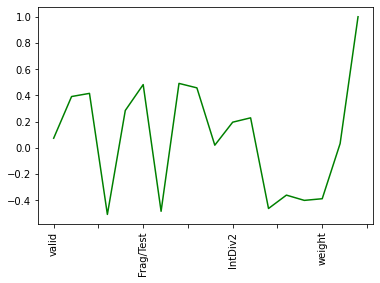

In [28]:
dft=df
molecular_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft=df[molecular_metrics].apply(pd.to_numeric)
molecular_metrics.pop()
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk']).dropna().plot(kind='line',rot=90,color="green")
dft.corrwith(dft['AUC_ROC_based_metric_with_nspdk'])

wl_mmd                            -0.401920
nspdk_mmd                         -0.402175
AUC_ROC_based_metric_with_nspdk    1.000000
dtype: float64

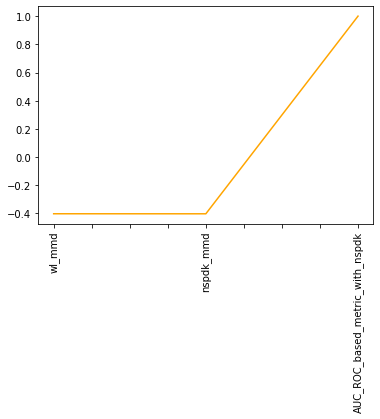

In [29]:
structural_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft2=df[structural_metrics].apply(pd.to_numeric)
structural_metrics.pop()
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="orange")
dft2.corrwith(dft2['AUC_ROC_based_metric_with_nspdk'])

<AxesSubplot: >

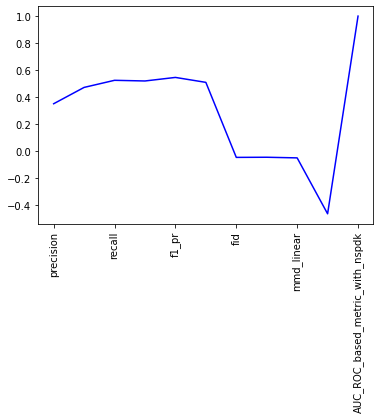

In [12]:
nn_metrics.append('AUC_ROC_based_metric_with_nspdk')
dft3=df[nn_metrics].apply(pd.to_numeric)
nn_metrics.pop()
dft3.corrwith(dft3['AUC_ROC_based_metric_with_nspdk']).plot(kind='line',rot=90,color="blue")

In [40]:
# New metric

df['AUC_ROC_based_metric_with_nspdk']=1-df['AUC_ROC_based_metric_with_nspdk']

In [39]:
df['AUC_ROC_based_metric_with_nspdk']

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.834879
         ...   
211    0.000000
212    0.000000
213    0.000000
214    0.000000
215    0.000000
Name: AUC_ROC_based_metric_with_nspdk, Length: 216, dtype: float64

In [41]:
df['AUC_ROC_based_metric_with_nspdk']

0      1.000000
1      1.000000
2      1.000000
3      1.000000
4      0.165121
         ...   
211    1.000000
212    1.000000
213    1.000000
214    1.000000
215    1.000000
Name: AUC_ROC_based_metric_with_nspdk, Length: 216, dtype: float64

C:\Users\cosmi\AppData\Local\Temp\ipykernel_5896\1286839258.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('generator_name').mean()[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


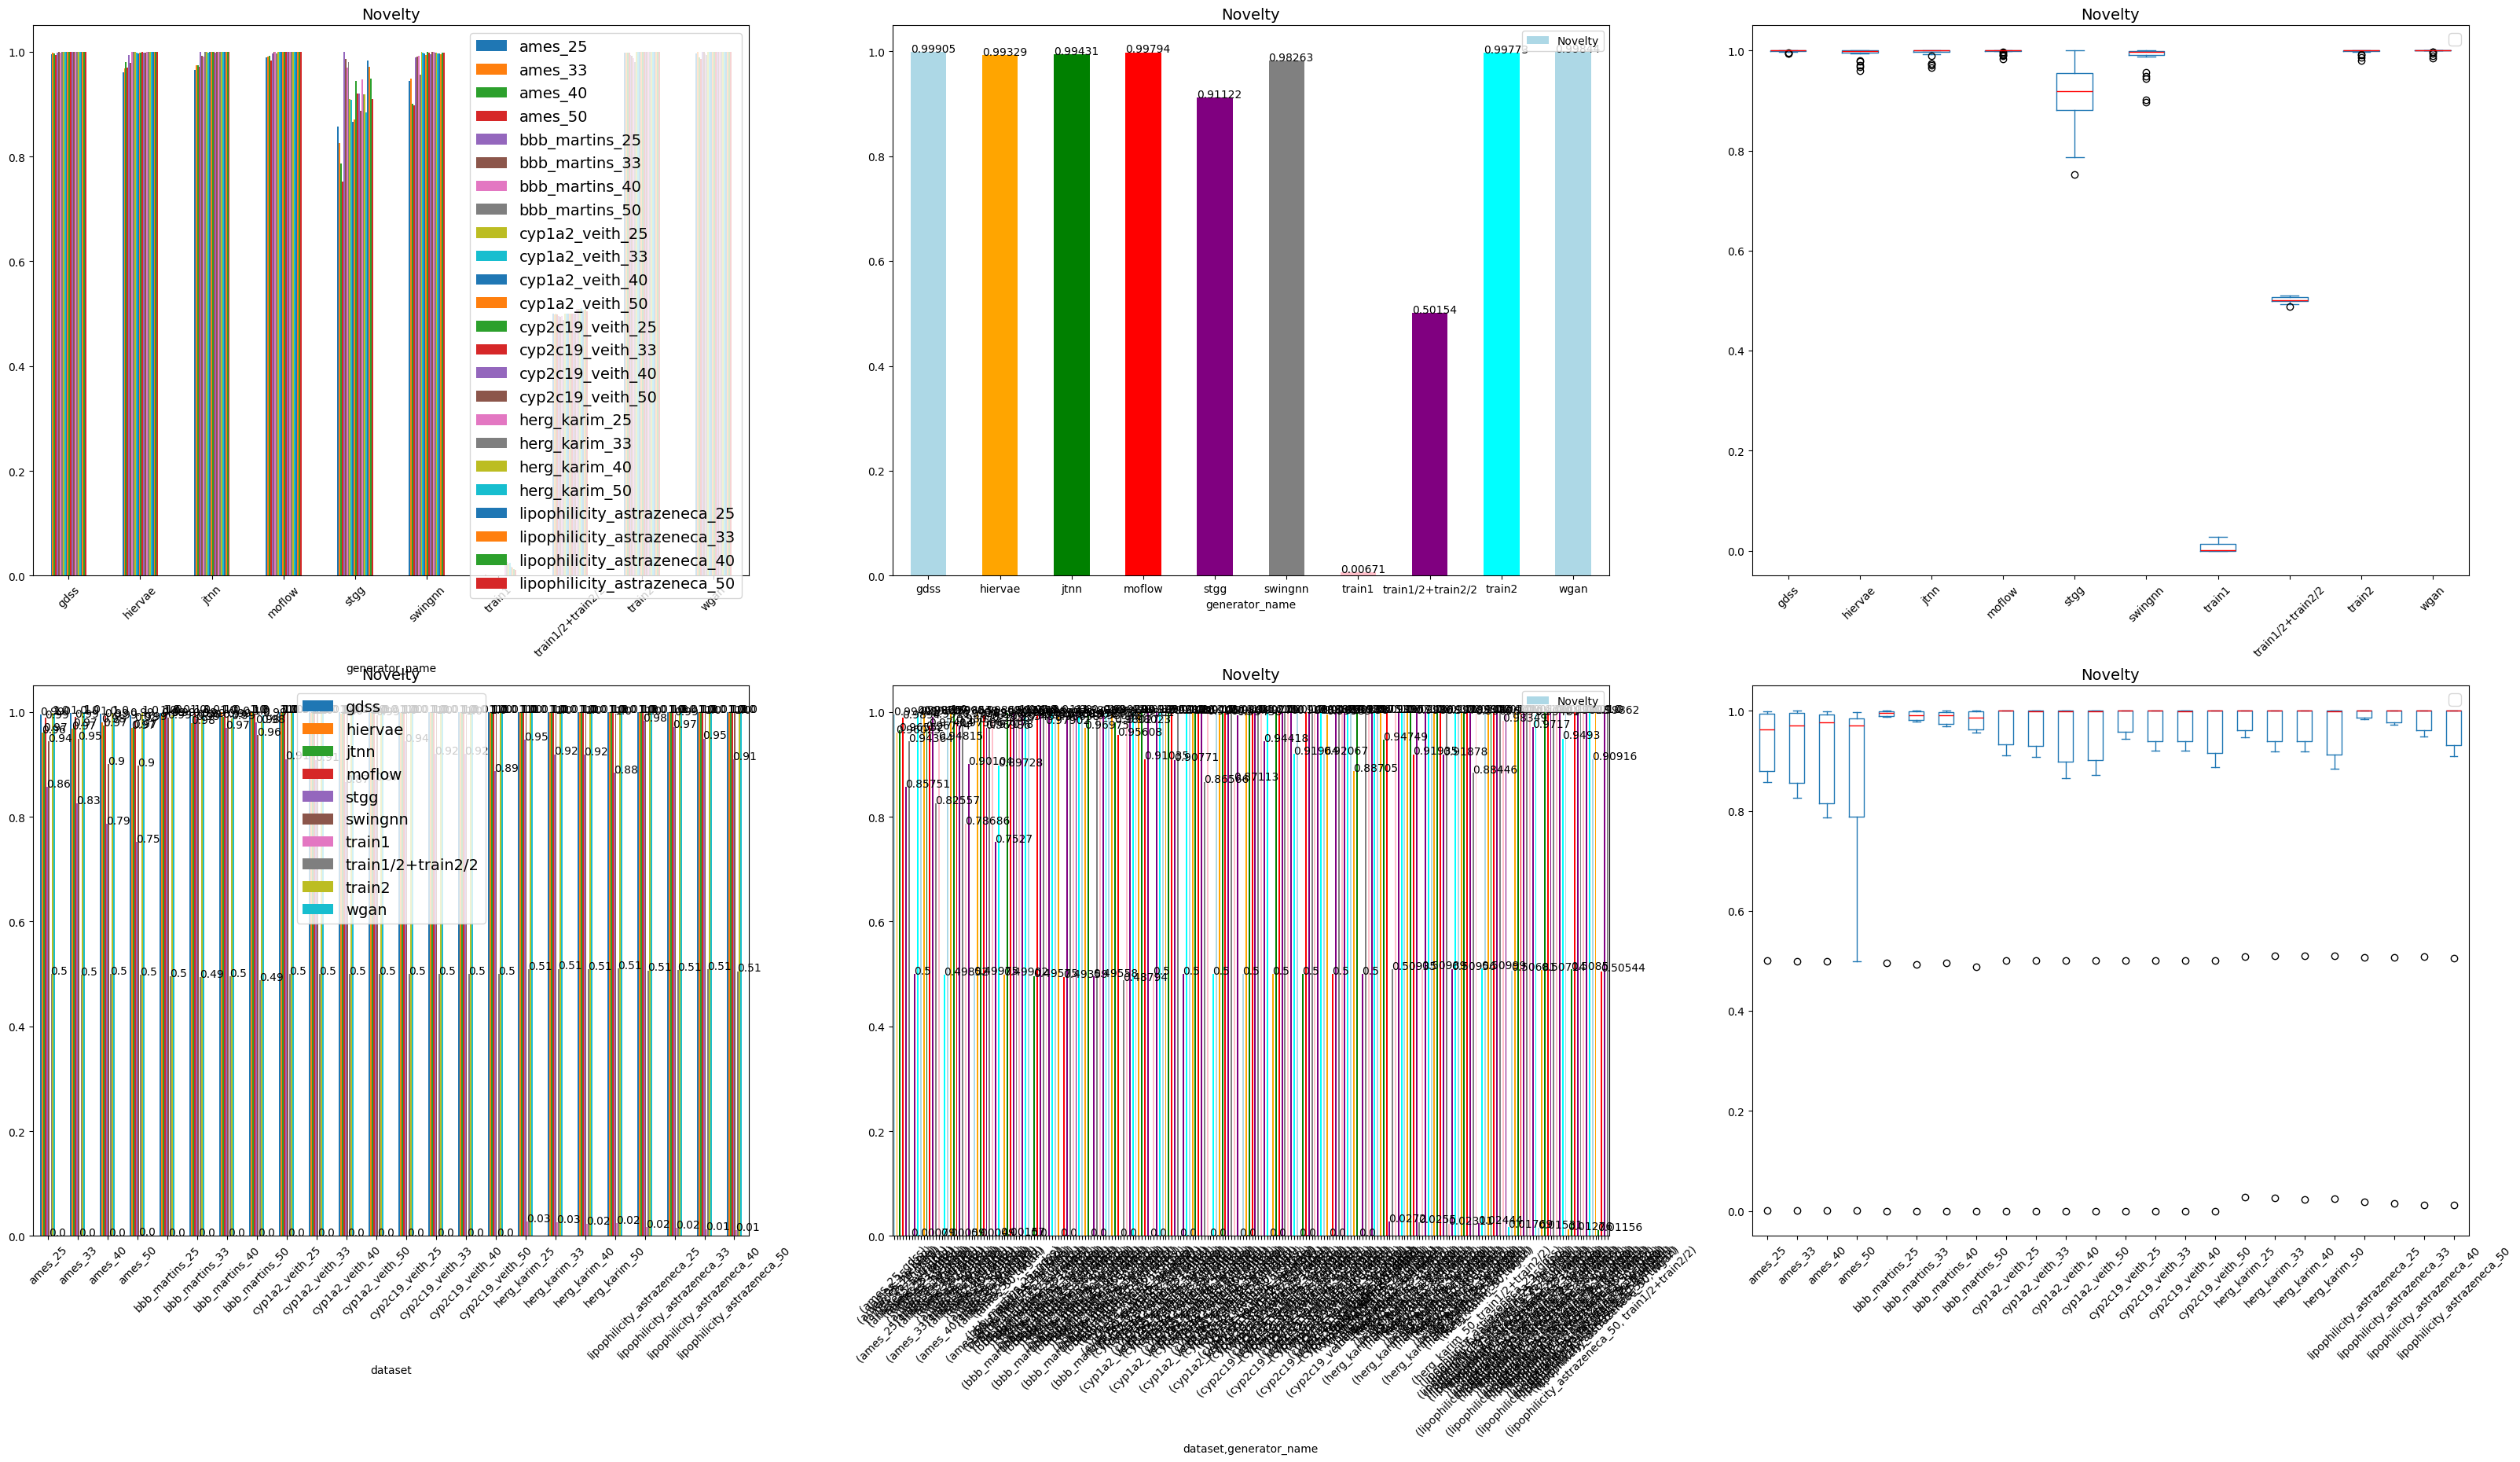

In [69]:

from matplotlib import pyplot as plt
def look_at_data_according_to_a_metric(metric_name):
    c = ['lightblue', 'orange', 'green', 'red', 'purple','gray','pink','purple','cyan']


    fig, ax = plt.subplots(2,3,figsize=(40, 20))
    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(rot=45,ax=ax[0,0],kind='bar')
    ax[0,0].set_title(metric_name,fontsize=14)
    #ax[0,0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,0].legend(fontsize=14, loc='upper right')
    #for p in ax[0,0].patches:
        #ax[0,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))



    df.groupby('generator_name').mean()[metric_name].plot.bar(ax=ax[0,1],rot=0,stacked=False,color =  c)
    ax[0,1].legend(fontsize=10,)
    ax[0,1].set_title(metric_name,fontsize=14)
    #ax[0,1].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=

    for p in ax[0,1].patches:
        ax[0,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))


    c = ['lightblue', 'orange', 'green', 'red', 'purple','gray','pink','purple','cyan']

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='box',rot=45,ax=ax[0,2],color=dict(medians='r'))
    ax[0,2].set_title(metric_name,fontsize=14)
    #ax[0,2].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    ax[0,2].legend(fontsize=14)

    pd.pivot_table(df, index='dataset', columns='generator_name', values=metric_name).plot(kind='bar',rot=45,ax=ax[1,0])
    ax[1,0].set_title(metric_name,fontsize=14)
    #ax[1,0].set_xticklabels(datasets,fontdict={'fontsize':14})
    ax[1,0].legend(fontsize=14)
    for p in  ax[1,0].patches:
        ax[1,0].annotate(str(np.round(p.get_height(),2)), (p.get_x(), p.get_height()))


    ax[1,1]=df_mean_by_dataset[metric_name].plot.bar(ax=ax[1,1],rot=45,stacked=False,color =  c)
    ax[1,1].legend(fontsize=10)
    ax[1,1].set_title(metric_name,fontsize=14)
    #ax[1,1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1,1].patches:
        ax[1,1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height())  )

    
    import matplotlib

    pd.pivot_table(df, index='generator_name', columns='dataset', values=metric_name).plot(rot=45,kind='box',ax=ax[1,2],color=dict(medians='r'))
    ax[1,2].set_title(metric_name,fontsize=14)
    #ax[1,2].set_xticklabels(datasets,fontdict={'fontsize':14})
    #ax[1,2].set_label(generators_labels)
    ax[1,2].legend(fontsize=14)

    



look_at_data_according_to_a_metric('Novelty')




In [34]:
df[['dataset','generator_name','AUC_ROC_based_metric_with_nspdk','AUC_ROC_based_metric_with_nspdk_time']]

,dataset,generator_name,AUC_ROC_based_metric_with_nspdk,AUC_ROC_based_metric_with_nspdk_time
0,ames_25,hiervae,0.000000,27.996322
1,ames_33,hiervae,0.000000,43.022686
2,ames_40,hiervae,0.000000,39.524141
3,ames_50,hiervae,0.000000,49.816979
4,bbb_martins_25,hiervae,0.834879,10.295381
...,...,...,...,...
211,herg_karim_50,train1,0.000000,164.679436
212,lipophilicity_astrazeneca_25,train1,0.000000,24.398643
213,lipophilicity_astrazeneca_33,train1,0.000000,36.311709
214,lipophilicity_astrazeneca_40,train1,0.000000,33.657414


## New metrics's Time

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


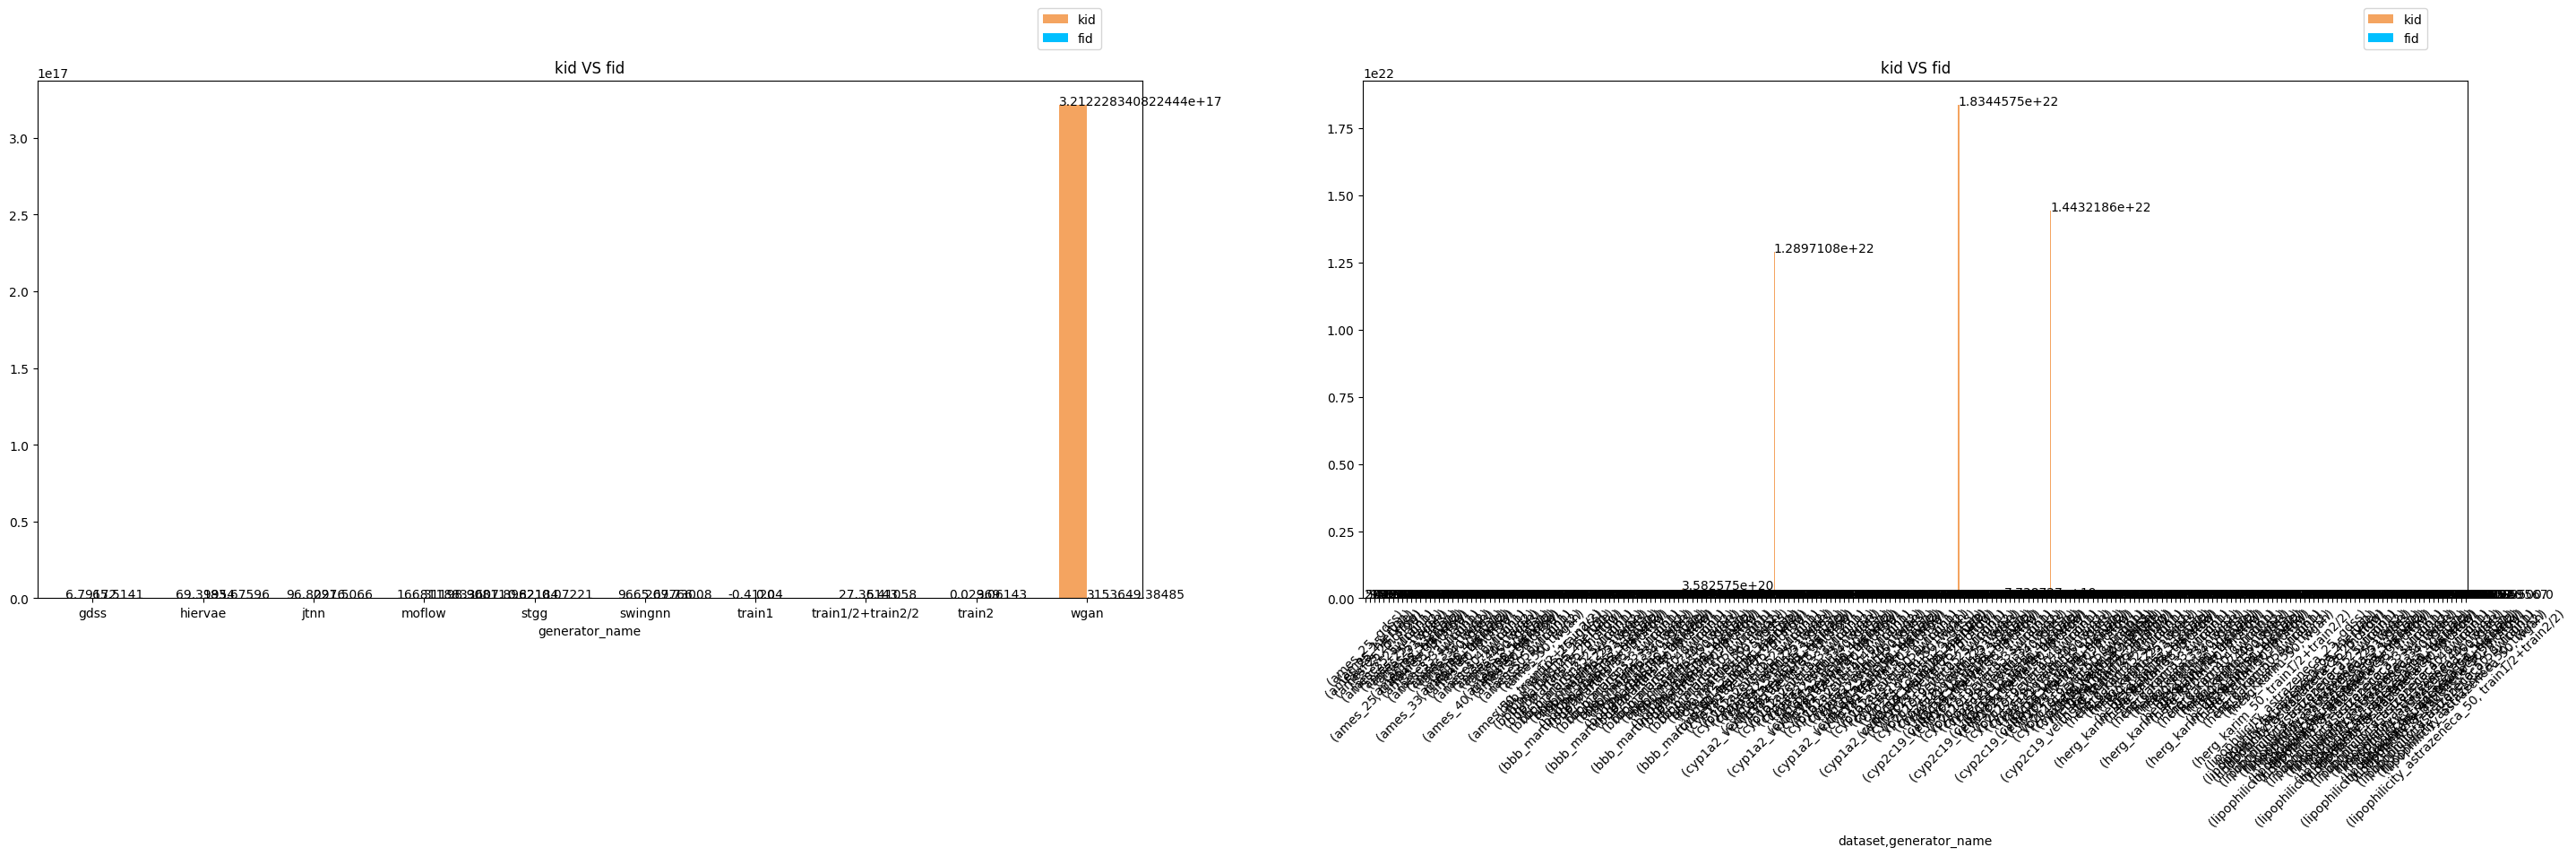

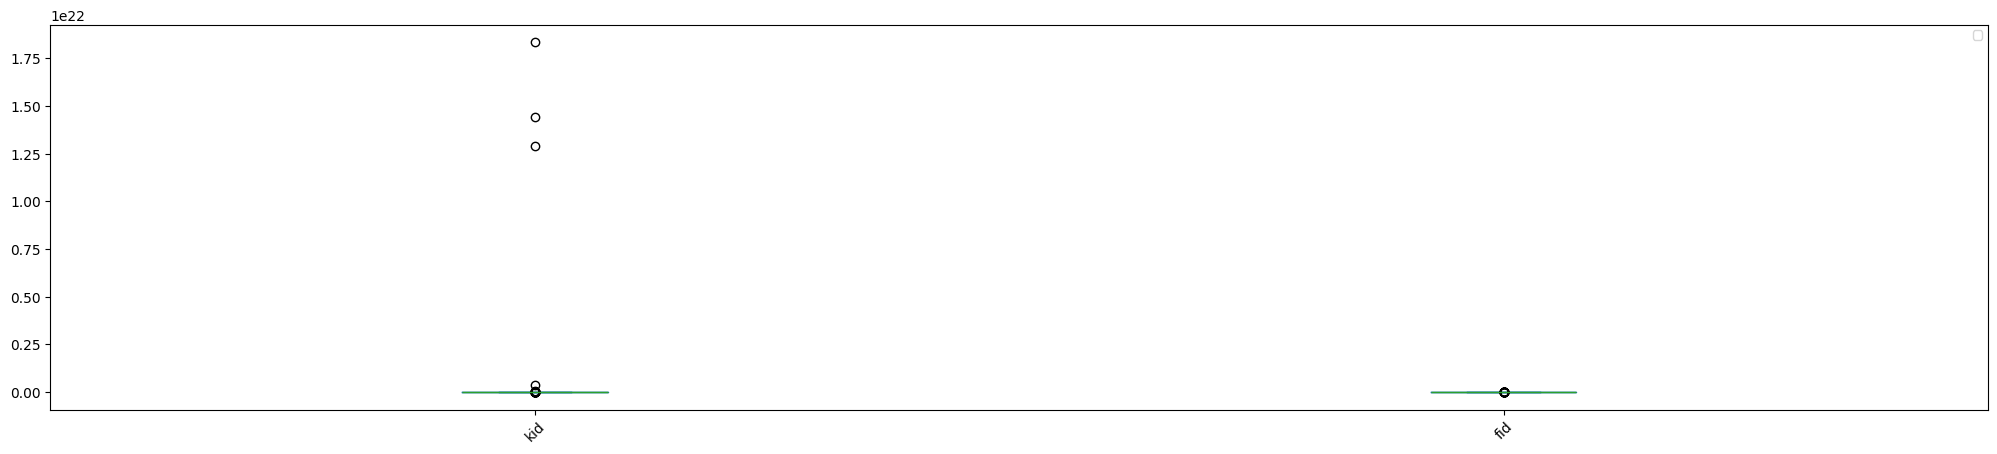

In [70]:
def compare_two_metrics(metric1, metric2,time=False):
    fix,ax=plt.subplots(1,2,figsize=(35,7.5))
    df_mean_by_generator[[metric1,metric2]].plot.bar(ax=ax[0],rot=0,stacked=False,color={'deepskyblue','sandybrown'})
    ax[0].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[0].set_title(metric1+' VS ' +metric2)
    #ax[0].set_xticklabels(generators_labels,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[0].patches:
        ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    #plt.subplots_adjust(right=1.5)

    df_mean_by_dataset[[metric1,metric2]].plot.bar(ax=ax[1],rot=45,stacked=False,color={'deepskyblue','sandybrown'})
    ax[1].legend(fontsize=10, loc='center left', bbox_to_anchor=(0.9, 1.1))
    ax[1].set_title(metric1+' VS ' +metric2)
    #ax[1].set_xticklabels(datasets,fontdict={'fontsize':14})
    # specify the columns to uses for alternate labels, in order based on the order of y=
    for p in ax[1].patches:
        ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
    
    fix,ax=plt.subplots(figsize=(25  ,5))

    ax=df[[metric1, metric2]].plot(ax=ax,subplots=False,rot=45,kind='box')
    plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
    
    if time:

            fix,ax=plt.subplots(1,2,figsize=(35,7.5))

            ax[1]=df_mean_by_dataset[[metric2+'_time',metric1+'_time']].plot(ax=ax[1],subplots=False,rot=90,kind='bar')
            #ax[1].set_xticklabels(labels=list(datasets),fontdict={'fontsize':12 }, rotation=45)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[1].patches:
                ax[1].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))

            ax[0]=df_mean_by_generator[[metric2+'_time',metric1+'_time']].plot(ax=ax[0],subplots=False,rot=90,kind='bar')
            #ax[0].set_xticklabels(labels=generators_labels,fontdict={'fontsize':12 }, rotation=0)
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
            for p in ax[0].patches:
                ax[0].annotate(str(np.round(p.get_height(),5)), (p.get_x(), p.get_height()))
            fix,ax=plt.subplots(figsize=(25  ,5))

            ax=df[[metric2+'_time',metric1+'_time']].plot(ax=ax,subplots=False,rot=45,kind='box')
            plt.legend(bbox_to_anchor=(1.0, 1.0),fontsize='small')
compare_two_metrics('kid','fid',time=False)



# Molecular metrics

In [72]:
from evaluation.utils import get_data,  get_mock_data,remove_empty_graphs_and_targets,\
    get_generated_data,preprocess
from evaluation.moses.metrics.utils  import logP, QED, SA,weight
from evaluation.mol_structure import list_of_smiles_to_nx_graphs
from rdkit import Chem
from rdkit.Chem import GetFormalCharge
from collections  import defaultdict
import pandas as pd

In [73]:
molecular_metrics=['valid', 'unique@1000', 'unique@10000', 'FCD/Test', 'SNN/Test' , 'Frag/Test', 'FCD/TestSF','SNN/TestSF',
 'Frag/TestSF', 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight', 'Novelty']

## Distribution of  QED, logP, SA and molecular weight  properties 




In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
dfs=[]
for dataset_name in current_smiles_datasets:
    for split in splits:
        smiles = []
        with open('data/smiles/{}/train1_smiles.txt'.format(dataset_name + split)) as my_file:
            for line in my_file:
                smiles.append(line.strip())
        train1_graphs=smiles
        mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
        log_p =[logP(mol) for mol in mols]
        qeds= [QED(mol) for mol in mols]
        sas= [SA(mol) for mol in mols]
        weights=[weight(mol) for mol in mols]
        d1={'generator':'traib1','dataset':dataset_name + split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
        dfs.append(pd.DataFrame(data=d1))

        

In [ ]:
current_smiles_datasets=['ames', 'bbb_martins', 'cyp1a2_veith', 'cyp2c19_veith','herg_karim','lipophilicity_astrazeneca']
splits=['_25','_33','_40','_50']
generators=['gdss','stgg','hiervae','moflow','wgan','jtnn','swingnn']
gens=[]
for generator_name in generators:
     for dataset_name in current_smiles_datasets:
                for split in splits:

                        print(generator_name,dataset_name+split)
                        pos_list, neg_list=[],[]
                        path_postives='data/smiles/{}/{}_gen_pos_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_postives) as my_file:
                                for line in my_file:
                                        pos_list.append(line.strip())
                        path_negatives='data/smiles/{}/{}_gen_neg_{}.txt'.format(dataset_name+split,dataset_name+split,generator_name)
                        with open(path_negatives) as my_file:
                                for line in my_file:
                                        neg_list.append(line.strip())
                        smiles=pos_list+neg_list
                        train1_graphs=smiles
                        try:
                                
                                mols =[Chem.MolFromSmiles(smiles)  for smiles in train1_graphs]
                                log_p =[logP(mol) for mol in mols]
                                qeds= [QED(mol) for mol in mols]
                                sas= [SA(mol) for mol in mols]
                                weights=[weight(mol) for mol in mols]
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':log_p, 'qed':qeds,'SAS':sas,'weight':weights}
                                gens.append(pd.DataFrame(data=d1))

                        except:
                                mols =0
                                log_p =0
                                qeds= 0
                                sas= 0
                                weights=0
                        
                                d1={'generator': generator_name,'dataset':dataset_name+split,'logP':[log_p], 'qed':[qeds],'SAS':[sas],'weight':[weights]}
                                gens.append(pd.DataFrame(data=d1))

              
              
                

In [ ]:
new1=pd.concat([dfs[i] for i in range(24) ], axis=0)
new2=pd.concat([gens[i] for i in range(len(gens))], axis=0)
new=pd.concat([new1,new2], axis=0)
new.to_csv('out.csv', index=False)

120

NameError: name 'new' is not defined

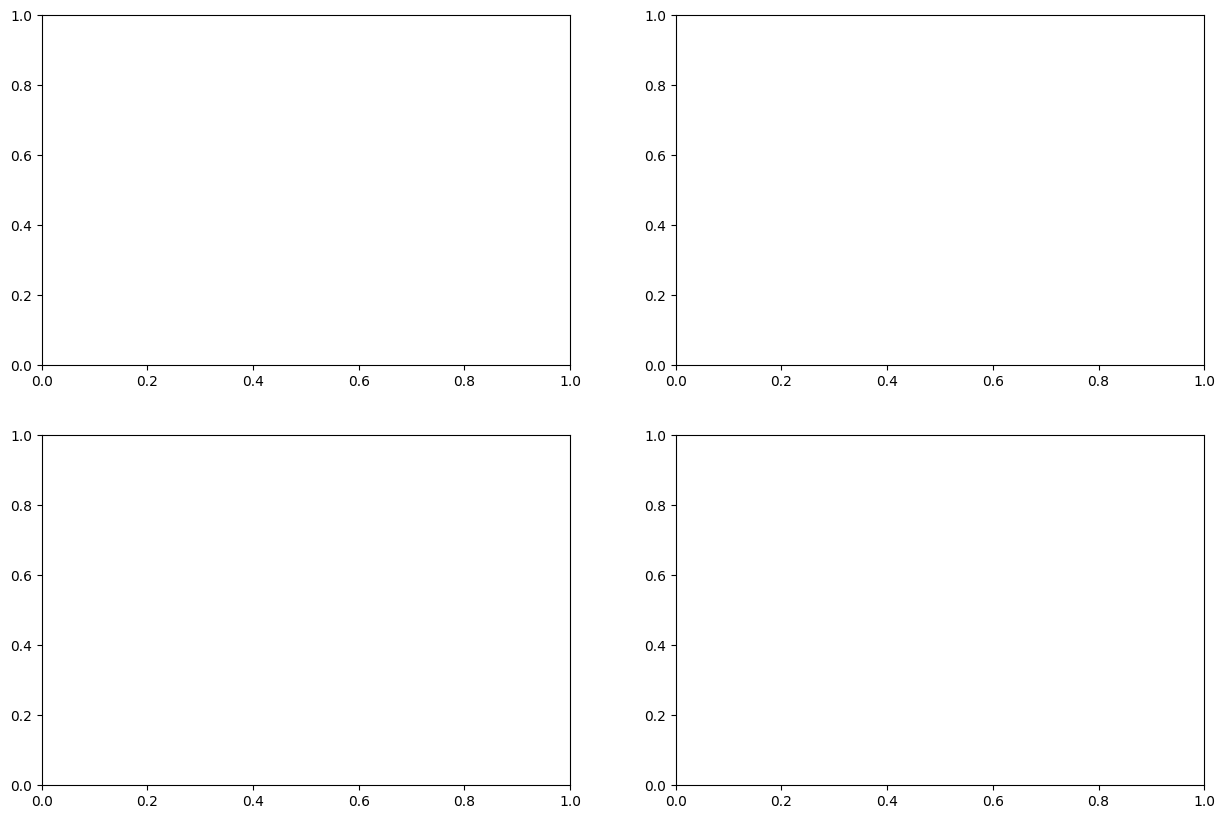

In [75]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(new[new.generator=='train1']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(new[new.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(new[new.generator=='train1']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(new[new.generator=='swingnn']['logP'], color="teal", shade=True,ax=ax[0,1])
ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(new[new.generator=='train1']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(new[new.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[0,1])
ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(new[new.generator=='train1']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(new[new.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(new[new.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN', 'jtnn', 'swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


In [88]:
new_copy=new.copy()

In [99]:
only_25=new_copy.loc[(new_copy.dataset=='ames_25') | (new_copy.dataset=='bbb_martins_25') | \
                      (new_copy.dataset=='herg_karim_25') | (new_copy.dataset=='cyp1a2_veith_25') \
                        | (new_copy.dataset=='cyp2c19_veith_25')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_25')   ]
only_33=new_copy.loc[(new_copy.dataset=='ames_33') | (new_copy.dataset=='bbb_martins_33') | \
                      (new_copy.dataset=='herg_karim_33') | (new_copy.dataset=='cyp1a2_veith_33') \
                        | (new_copy.dataset=='cyp2c19_veith_33')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_33')   ]
only_40=new_copy.loc[(new_copy.dataset=='ames_40') | (new_copy.dataset=='bbb_martins_40') | \
                      (new_copy.dataset=='herg_karim_40') | (new_copy.dataset=='cyp1a2_veith_40') \
                        | (new_copy.dataset=='cyp2c19_veith_40')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_40') ]
only_50=new_copy.loc[(new_copy.dataset=='ames_50') | (new_copy.dataset=='bbb_martins_50') | \
                      (new_copy.dataset=='herg_karim_50') | (new_copy.dataset=='cyp1a2_veith_50') \
                        | (new_copy.dataset=='cyp2c19_veith_50')| \
                       (new_copy.dataset=='lipophilicity_astrazeneca_50') ]

Text(0.5, 1.0, 'Molecular Weight')

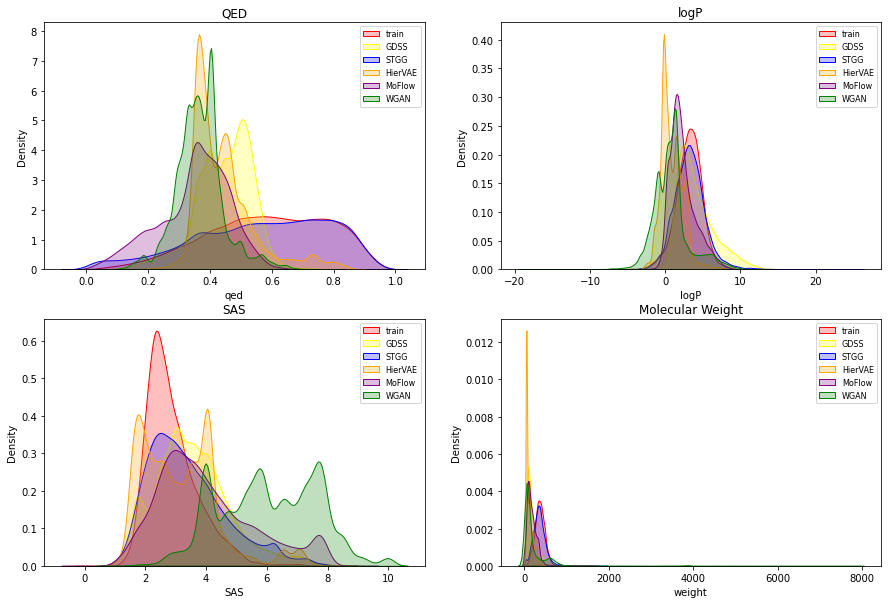

In [107]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_25[only_25.generator=='train1']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_25[only_25.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_25[only_25.generator=='train1']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['logP'], color="teal", shade=True,
ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_25[only_25.generator=='train1']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_25[only_25.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_25[only_25.generator=='train1']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_25[only_25.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_25[only_25.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
#sns.kdeplot(only_25[only_25.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

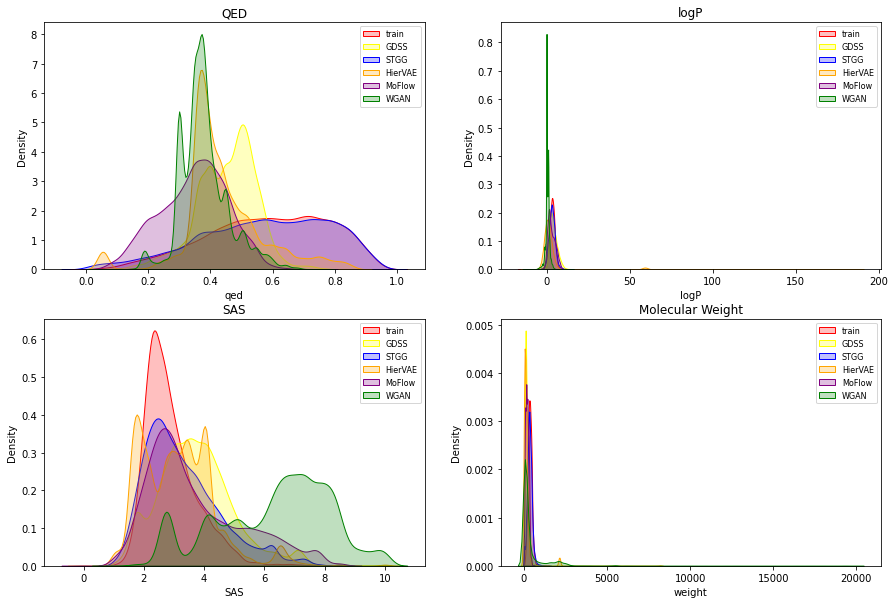

In [106]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_33[only_33.generator=='train11']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_33[only_33.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_33[only_33.generator=='train11']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(only_33[only_33.generator=='swingnn']['logP'], color="teal", shade=True,ax=ax[0,1])

ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_33[only_33.generator=='train11']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(only_33[only_33.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_33[only_33.generator=='train11']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_33[only_33.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(only_33[only_33.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])

ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

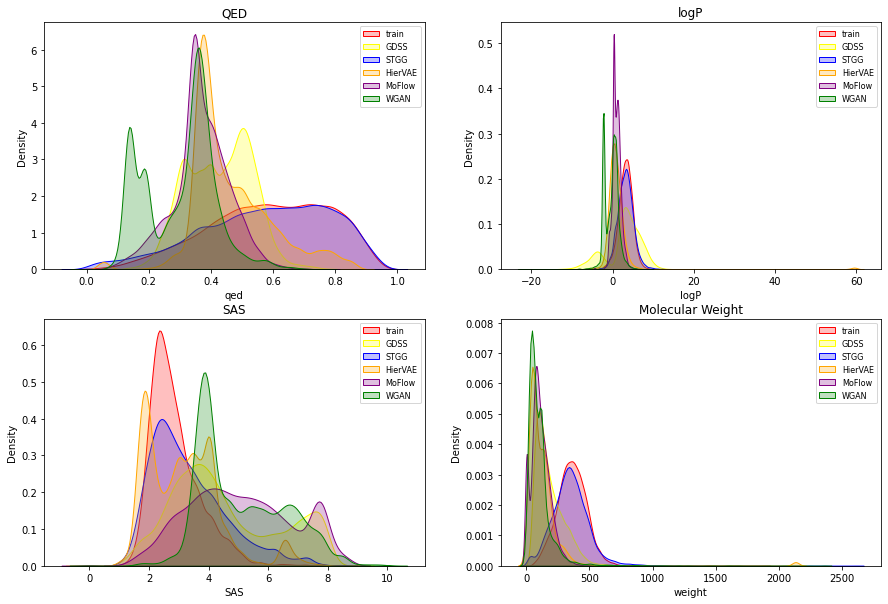

In [105]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_40[only_40.generator=='train11']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_40[only_40.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_40[only_40.generator=='train11']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(only_40[only_40.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])

ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_40[only_40.generator=='train11']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(only_40[only_40.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_40[only_40.generator=='train11']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_40[only_40.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(only_40[only_40.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])

ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


Text(0.5, 1.0, 'Molecular Weight')

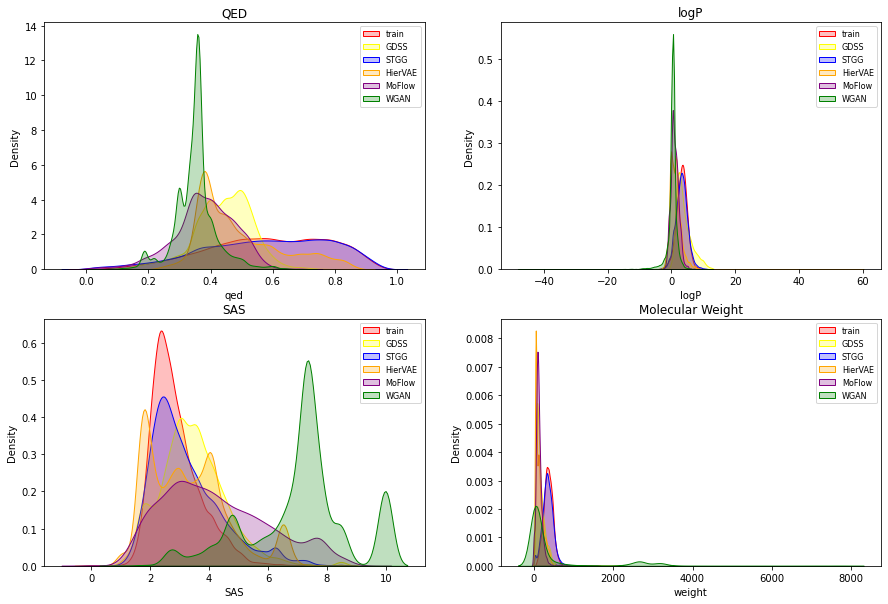

In [104]:

import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore") 
 

fig,ax=plt.subplots(2,2,figsize=(15, 10))

sns.kdeplot(only_50[only_50.generator=='train11']['qed'], color="red", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['qed'], color="yellow", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['qed'], color="blue", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['qed'], color="orange", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['qed'], color="purple", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['qed'], color="green", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='jtnn']['qed'], color="teal", shade=True,ax=ax[0,0])
sns.kdeplot(only_50[only_50.generator=='swingnn']['qed'], color="teal", shade=True,ax=ax[0,0])


ax[0,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,0].set_title('QED')


sns.kdeplot(only_50[only_50.generator=='train11']['logP'], color="red", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='gdss']['logP'], color="yellow", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['logP'], color="blue", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['logP'], color="orange", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['logP'], color="purple", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['logP'], color="green", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='jtnn']['logP'], color="teal", shade=True,ax=ax[0,1])
sns.kdeplot(only_50[only_50.generator=='swingnn']['logP'], color="teal", shade=True,ax=ax[0,1])

ax[0,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[0,1].set_title('logP')


sns.kdeplot(only_50[only_50.generator=='train11']['SAS'], color="red", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='gdss']['SAS'], color="yellow", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='stgg']['SAS'], color="blue", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='hiervae']['SAS'], color="orange", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='moflow']['SAS'], color="purple", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='wgan']['SAS'], color="green", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='jtnn']['SAS'], color="teal", shade=True,ax=ax[1,0])
sns.kdeplot(only_50[only_50.generator=='swingnn']['SAS'], color="teal", shade=True,ax=ax[1,0])

ax[1,0].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,0].set_title('SAS')


sns.kdeplot(only_50[only_50.generator=='train11']['weight'], color="red", shade=True,ax=ax[1,1])

sns.kdeplot(only_50[only_50.generator=='gdss']['weight'], color="yellow", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='stgg']['weight'], color="blue", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='hiervae']['weight'], color="orange", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='moflow']['weight'], color="purple", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='wgan']['weight'], color="green", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='jtnn']['weight'], color="teal", shade=True,ax=ax[1,1])
sns.kdeplot(only_50[only_50.generator=='swingnn']['weight'], color="teal", shade=True,ax=ax[1,1])

ax[1,1].legend(labels=['train1','GDSS','STGG','HierVAE','MoFlow','WGAN','jtnn','swingnn'],fontsize=8)
ax[1,1].set_title('Molecular Weight')


##  Other visualisations

In [36]:

mol_25=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
mol_25.generator_name=mol_25.generator_name+'_25'
mol_25=mol_25.groupby('generator_name').mean()


mol_33=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
mol_33.generator_name=mol_33.generator_name+'_33'
mol_33=mol_33.groupby('generator_name').mean()

mol_40=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
mol_40.generator_name=mol_40.generator_name+'_40'
mol_40=mol_40.groupby('generator_name').mean()

mol_50=df[molecular_metrics+['generator_name'] ].loc[(df.generator_name!='train1') & (df.generator_name!='train2')  & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
mol_50.generator_name=mol_50.generator_name+'_50'
mol_50=mol_50.groupby('generator_name').mean()
mol_50

pd.concat([mol_25,mol_33,mol_40,mol_50]).sort_values(by=['generator_name'])

,valid,unique@1000,unique@10000,FCD/Test,SNN/Test,Frag/Test,FCD/TestSF,SNN/TestSF,Frag/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight,Novelty
generator_name,,,,,,,,,,,,,,,,,
hiervae_25,1.0,0.156110,0.136675,0.177815,0.934914,0.994587,52.921050,0.066455,0.000000,0.440536,0.384259,0.992240,7.316795,0.148164,0.101546,307.177913,1.0
hiervae_33,1.0,0.163846,0.119039,0.143939,0.912715,0.804154,52.952458,0.066965,0.000000,0.429437,0.376973,0.992229,9.651380,0.193257,0.094301,355.497778,1.0
hiervae_40,1.0,0.164015,0.113478,0.164040,0.935255,0.663322,52.921827,0.073162,0.000000,0.402800,0.352725,0.995091,8.032417,0.158674,0.107727,305.788641,1.0
hiervae_50,1.0,0.181758,0.101911,0.139427,0.939419,0.891924,52.952161,0.069098,0.000000,0.405832,0.359091,0.994259,6.593971,0.131174,0.104029,279.649647,1.0
wgan_25,1.0,0.285101,0.304053,2.008752,0.505191,0.539832,52.197619,0.055233,0.000000,0.720312,0.571568,0.437957,10.086590,0.688540,0.069280,301.755486,1.0
wgan_33,1.0,0.361417,0.354035,3.463892,0.408294,0.242498,52.866548,0.053476,0.166667,0.589015,0.480968,0.365563,10.001265,0.653261,0.057969,398.740616,1.0
wgan_40,1.0,0.204679,0.236998,2.678112,0.494349,0.650269,52.653204,0.054557,0.000000,0.659274,0.514929,0.409431,10.647912,0.754229,0.071501,307.294838,1.0
wgan_50,1.0,0.363202,0.337372,2.310944,0.564390,0.703011,51.932766,0.054410,0.000000,0.733463,0.608670,0.455742,9.862614,0.720221,0.078437,468.908162,1.0


In [206]:
molecular_metrics_to_display=['valid', 'Novelty','unique@1000', 'Frag/Test' ,'FCD/Test', 'FCD/TestSF','SNN/Test','SNN/TestSF' , 'IntDiv', 'IntDiv2', 'Filters', 'logP', 'SA', 'QED', 'weight']
df_mean_by_generator[molecular_metrics_to_display]

,valid,Novelty,unique@1000,Frag/Test,FCD/Test,FCD/TestSF,SNN/Test,SNN/TestSF,IntDiv,IntDiv2,Filters,logP,SA,QED,weight
generator_name,,,,,,,,,,,,,,,
gdss,1.0,1.0,0.100266,0.956553,3.363658e-01,53.346986,0.770973,0.047427,0.179297,0.145936,0.955004,4.336116,0.295364,0.089063,243.442162
hiervae,1.0,1.0,0.162480,0.993450,1.583202e-01,52.934602,0.930503,0.068938,0.418676,0.367255,0.993862,7.903402,0.157197,0.101708,312.460260
moflow,1.0,1.0,0.620900,0.938929,6.313038e-01,52.142548,0.735833,0.068991,0.674551,0.621237,0.482847,7.358676,0.574802,0.095736,224.483915
stgg,1.0,1.0,0.778605,0.999717,3.597238e-03,53.025739,0.996328,0.089129,0.319452,0.297746,0.978244,0.800831,0.025771,0.017339,31.792756
train1,1.0,1.0,0.818481,1.000000,-6.335120e-08,53.038169,1.000000,0.089791,0.315155,0.294377,0.975788,0.000000,0.000000,0.000000,0.000000
train1/2+train2/2,1.0,1.0,0.807535,0.999988,1.283450e-03,53.031075,0.998390,0.089729,0.316387,0.295550,0.975075,0.131067,0.007149,0.003604,5.201379
train2,1.0,1.0,0.802442,0.999976,2.497879e-03,53.026236,0.997570,0.089644,0.318105,0.297097,0.975579,0.157312,0.008369,0.004271,6.620743
wgan,1.0,1.0,0.305314,0.390920,2.640481e+00,52.399314,0.493696,0.054376,0.674167,0.544385,0.418446,10.151429,0.707888,0.069168,370.350624


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


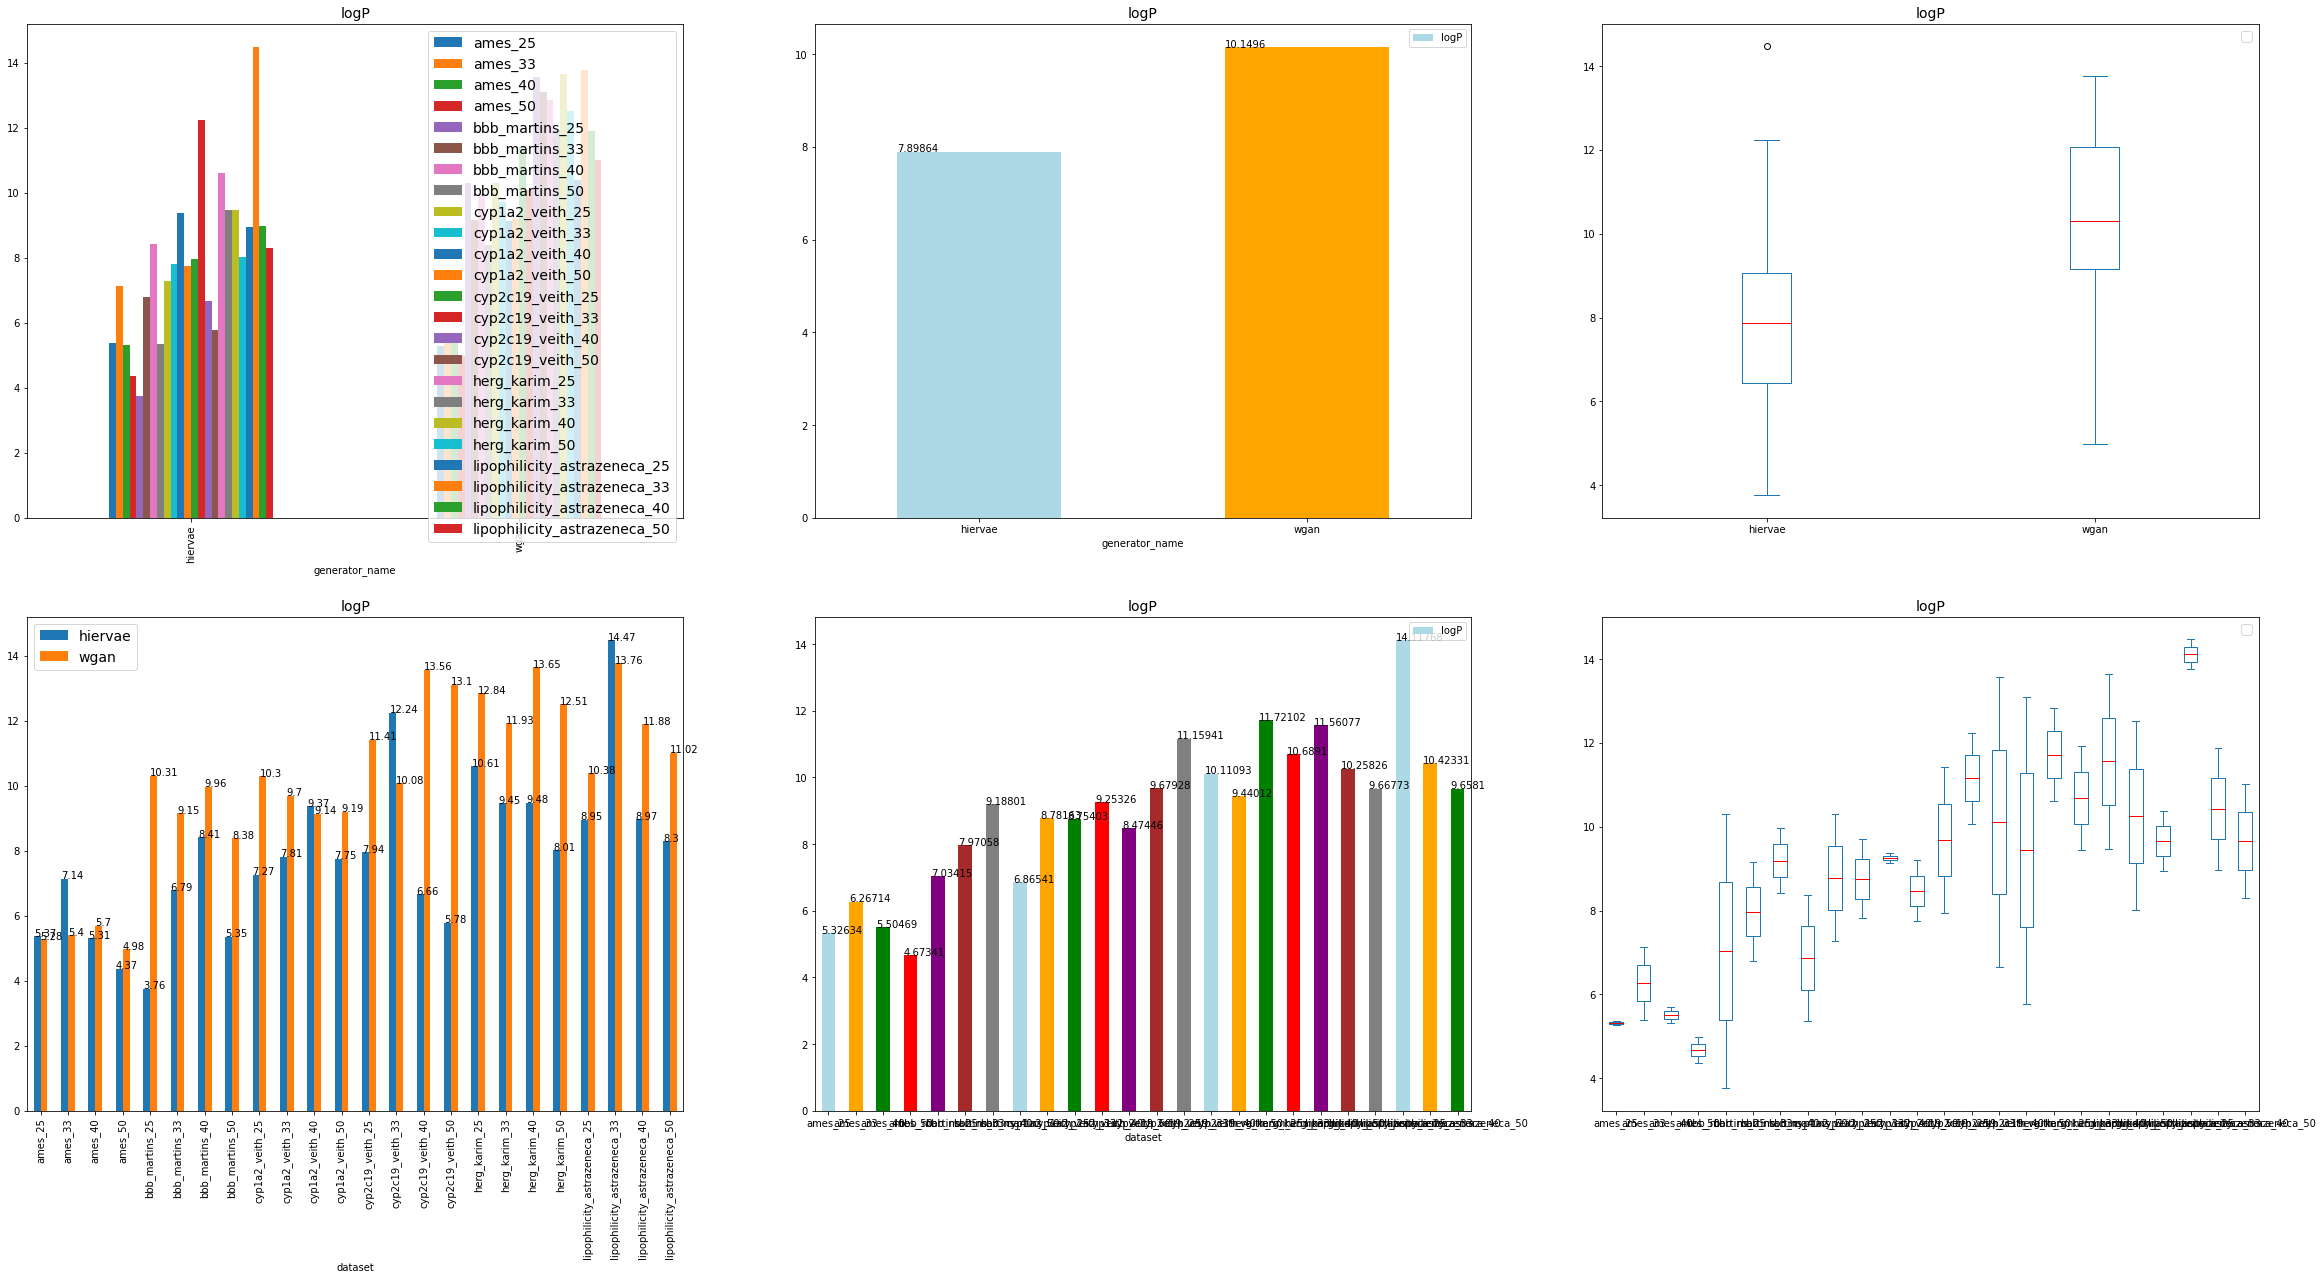

In [24]:
look_at_data_according_to_a_metric('logP')


# NN_based metrics

In [25]:
df_mean_by_generator[nn_metrics]

,precision,density,recall,coverage,f1_pr,f1_dc,fid,kid,mmd_linear,mmd_rbf
generator_name,,,,,,,,,,
hiervae,0.712690,0.451874,0.149647,0.047865,0.196885,0.083769,6.692809e+02,2.043760e+07,1.705864e+02,0.771134
wgan,0.452498,0.183245,0.138689,0.016240,0.116407,0.029043,6.764531e+08,1.145669e+23,3.005261e+06,0.574830


In [26]:

nn_25=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
nn_25.generator_name=nn_25.generator_name+'_25'
nn_25=nn_25.groupby('generator_name').mean()


nn_33=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
nn_33.generator_name=nn_33.generator_name+'_33'
nn_33=nn_33.groupby('generator_name').mean()

nn_40=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
nn_40.generator_name=nn_40.generator_name+'_40'
nn_40=nn_40.groupby('generator_name').mean()

nn_50=df[nn_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
nn_50.generator_name=nn_50.generator_name+'_50'
nn_50=nn_50.groupby('generator_name').mean()
nn_50

df3=pd.concat([nn_25,nn_33,nn_40,nn_50]).sort_values(by=['generator_name']).reset_index()
df3_gdss=df3.loc[(df3.generator_name == 'gdss_25' )|( df3.generator_name == 'gdss_33') | (df3.generator_name == 'gdss_40') | (df3.generator_name == 'gdss_50')]  
df3_stgg=df3.loc[(df3.generator_name == 'stgg_25' )|( df3.generator_name == 'stgg_33') | (df3.generator_name == 'stgg_40') | (df3.generator_name == 'stgg_50')]  
df3_moflow=df3.loc[(df3.generator_name == 'moflow_25' )|( df3.generator_name == 'moflow_33') | (df3.generator_name == 'moflow_40') | (df3.generator_name == 'moflow_50')]  
df3_hiervae=df3.loc[(df3.generator_name == 'hiervae_25' )|( df3.generator_name == 'hiervae_33') | (df3.generator_name == 'hiervae_40') | (df3.generator_name == 'hiervae_50')]  
df3_wgan=df3.loc[(df3.generator_name == 'wgan_25' )|( df3.generator_name == 'wgan_33') | (df3.generator_name == 'wgan_40') | (df3.generator_name == 'wgan_50')]  


Text(0.5, 1.0, 'hiervae')

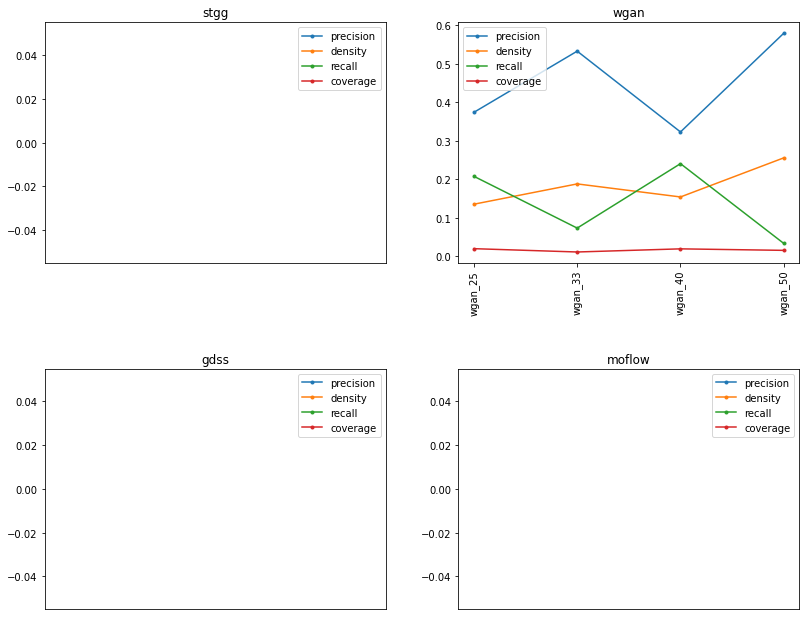

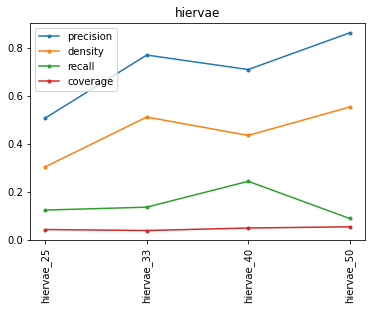

In [27]:
fig,ax=plt.subplots(2, 2, figsize=(12.5,10))

df3_stgg[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[0,0] ,kind='line',label='generator_name',rot=90,style='.-')
ax[0,0].set_xticks(df3_stgg.index)
ax[0,0].set_xticklabels(df3_stgg.generator_name)
ax[0,0].set_title('stgg')


df3_wgan[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[0,1],kind='line',label='generator_name',rot=90,style='.-')
ax[0,1].set_xticks(df3_wgan.index)
ax[0,1].set_xticklabels(df3_wgan.generator_name)
ax[0,1].set_title('wgan')


df3_gdss[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[1,0],kind='line',label='generator_name',rot=90,style='.-')
ax[1,0].set_xticks(df3_gdss.index)
ax[1,0].set_xticklabels(df3_gdss.generator_name)
ax[1,0].set_title('gdss')
fig.tight_layout(pad=5.0)

df3_moflow[['precision',	'density',	'recall',	'coverage'	]].plot(ax=ax[1,1],kind='line',label='generator_name',rot=90,style='.-')
ax[1,1].set_xticks(df3_moflow.index)
ax[1,1].set_xticklabels(df3_moflow.generator_name)
ax[1,1].set_title('moflow')


ax=df3_hiervae[['precision',	'density',	'recall',	'coverage'	]].plot(kind='line',label='generator_name',rot=90,style='.-')
ax.set_xticks(df3_hiervae.index)
ax.set_xticklabels(df3_hiervae.generator_name)
ax.set_title('hiervae')




[Text(20, 0, 'wgan_25'),
 Text(21, 0, 'wgan_33'),
 Text(22, 0, 'wgan_40'),
 Text(23, 0, 'wgan_50')]

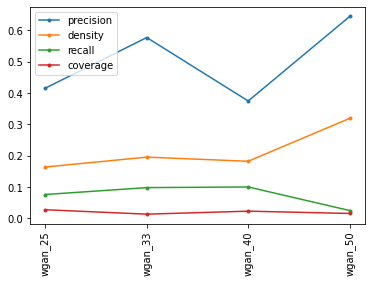

# Structural metrics



In [28]:
df_mean_by_generator[structural_metrics]

,wl_mmd,nspdk_mmd
generator_name,,
hiervae,0.300559,0.150640
wgan,0.934989,0.379886


In [29]:

nn_25=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_25') | (df.dataset=='bbb_martins_25') | \
                      (df.dataset=='herg_karim_25') | (df.dataset=='cyp1a2_veith_25') \
                        | (df.dataset=='cyp2c19_veith_25')| \
                       (df.dataset=='lipophilicity_astrazeneca_25'))]
nn_25.generator_name=nn_25.generator_name+'_25'
nn_25=nn_25.groupby('generator_name').mean()


nn_33=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_33') | (df.dataset=='bbb_martins_33') | \
                      (df.dataset=='herg_karim_33') | (df.dataset=='cyp1a2_veith_33') \
                        | (df.dataset=='cyp2c19_veith_33')| \
                       (df.dataset=='lipophilicity_astrazeneca_33'))]
nn_33.generator_name=nn_33.generator_name+'_33'
nn_33=nn_33.groupby('generator_name').mean()

nn_40=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_40') | (df.dataset=='bbb_martins_40') | \
                      (df.dataset=='herg_karim_40') | (df.dataset=='cyp1a2_veith_40') \
                        | (df.dataset=='cyp2c19_veith_40')| \
                       (df.dataset=='lipophilicity_astrazeneca_40'))]
nn_40.generator_name=nn_40.generator_name+'_40'
nn_40=nn_40.groupby('generator_name').mean()

nn_50=df[structural_metrics+['generator_name'] ].loc[(df.generator_name!='train1')   & (df.generator_name!='train1/2+train2/2') & ((df.dataset=='ames_50') | (df.dataset=='bbb_martins_50') | \
                      (df.dataset=='herg_karim_50') | (df.dataset=='cyp1a2_veith_50') \
                        | (df.dataset=='cyp2c19_veith_50')| \
                       (df.dataset=='lipophilicity_astrazeneca_50'))]
nn_50.generator_name=nn_50.generator_name+'_50'
nn_50=nn_50.groupby('generator_name').mean()
nn_50

df3=pd.concat([nn_25,nn_33,nn_40,nn_50]).sort_values(by=['generator_name']).reset_index()
df3_gdss=df3.loc[(df3.generator_name == 'gdss_25' )|( df3.generator_name == 'gdss_33') | (df3.generator_name == 'gdss_40') | (df3.generator_name == 'gdss_50')]  
df3_stgg=df3.loc[(df3.generator_name == 'stgg_25' )|( df3.generator_name == 'stgg_33') | (df3.generator_name == 'stgg_40') | (df3.generator_name == 'stgg_50')]  
df3_moflow=df3.loc[(df3.generator_name == 'moflow_25' )|( df3.generator_name == 'moflow_33') | (df3.generator_name == 'moflow_40') | (df3.generator_name == 'moflow_50')]  
df3_hiervae=df3.loc[(df3.generator_name == 'hiervae_25' )|( df3.generator_name == 'hiervae_33') | (df3.generator_name == 'hiervae_40') | (df3.generator_name == 'hiervae_50')]  
df3_wgan=df3.loc[(df3.generator_name == 'wgan_25' )|( df3.generator_name == 'wgan_33') | (df3.generator_name == 'wgan_40') | (df3.generator_name == 'wgan_50')]  


Text(0.5, 1.0, 'hiervae')

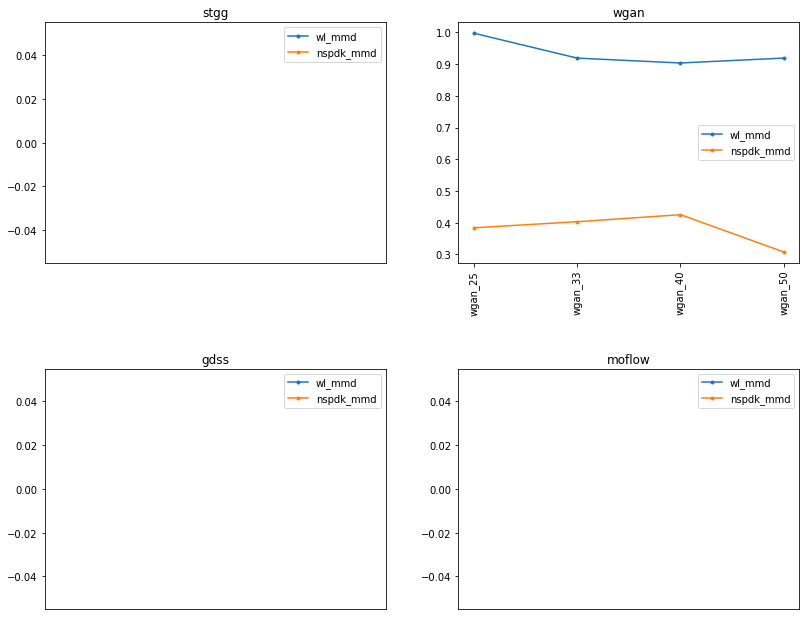

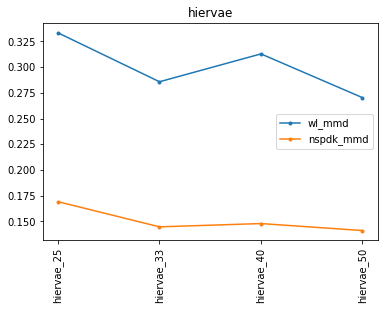

In [30]:
fig,ax=plt.subplots(2, 2, figsize=(12.5,10))
df3_stgg[[	'wl_mmd',	'nspdk_mmd']].plot(ax=ax[0,0] ,kind='line',label='generator_name',rot=90,style='.-')
ax[0,0].set_xticks(df3_stgg.index)
ax[0,0].set_xticklabels(df3_stgg.generator_name)
ax[0,0].set_title('stgg')


df3_wgan[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[0,1],kind='line',label='generator_name',rot=90,style='.-')
ax[0,1].set_xticks(df3_wgan.index)
ax[0,1].set_xticklabels(df3_wgan.generator_name)
ax[0,1].set_title('wgan')


df3_gdss[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[1,0],kind='line',label='generator_name',rot=90,style='.-')
ax[1,0].set_xticks(df3_gdss.index)
ax[1,0].set_xticklabels(df3_gdss.generator_name)
ax[1,0].set_title('gdss')
fig.tight_layout(pad=5.0)

df3_moflow[['wl_mmd',	'nspdk_mmd'	]].plot(ax=ax[1,1],kind='line',label='generator_name',rot=90,style='.-')
ax[1,1].set_xticks(df3_moflow.index)
ax[1,1].set_xticklabels(df3_moflow.generator_name)
ax[1,1].set_title('moflow')


ax=df3_hiervae[['wl_mmd',	'nspdk_mmd'	]].plot(kind='line',label='generator_name',rot=90,style='.-')
ax.set_xticks(df3_hiervae.index)
ax.set_xticklabels(df3_hiervae.generator_name)
ax.set_title('hiervae')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


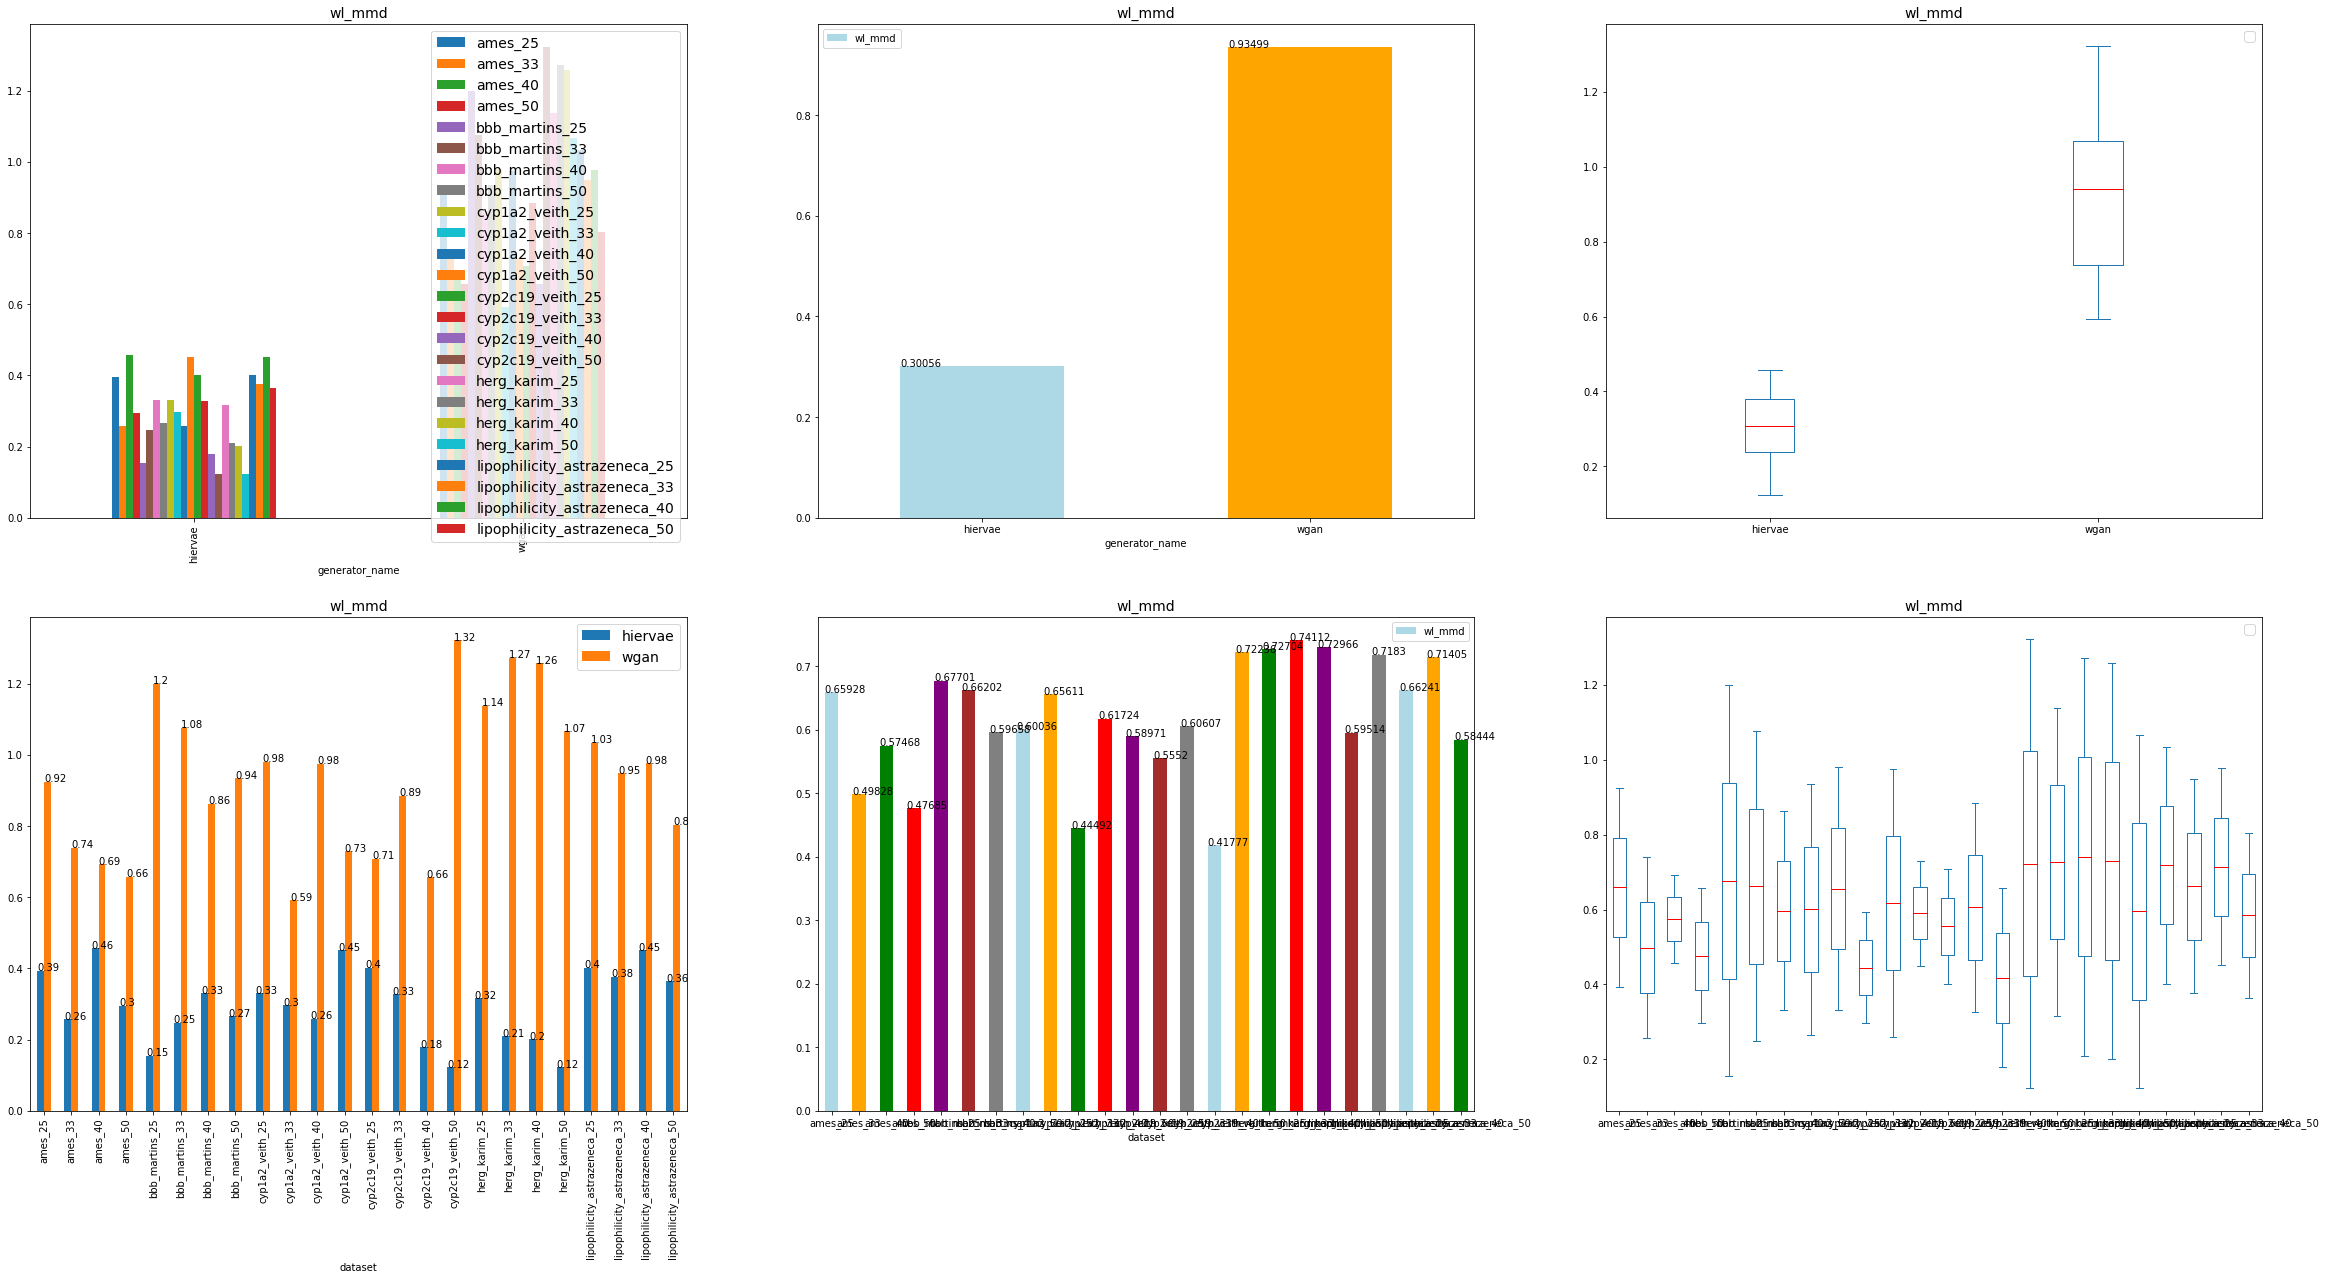

In [31]:
look_at_data_according_to_a_metric('wl_mmd')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


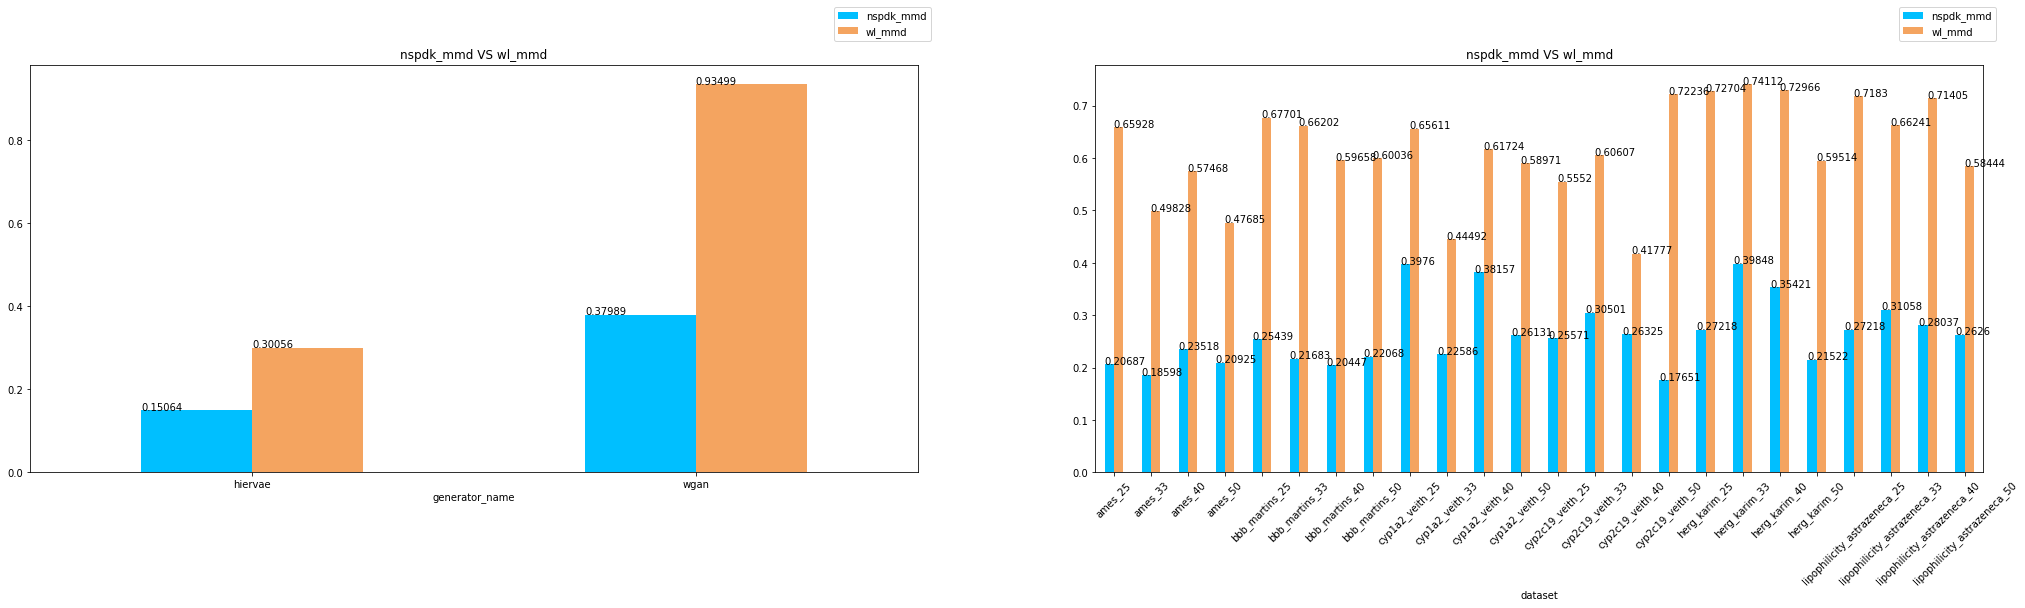

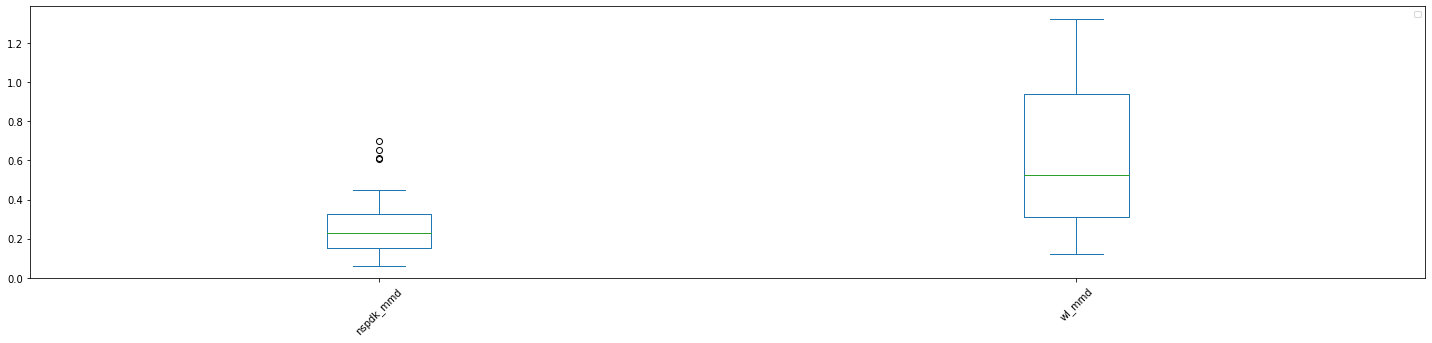

In [32]:
compare_two_metrics('nspdk_mmd','wl_mmd')


#Draft section